In [1]:
pip install geopandas plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import modules
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.animation as animation
import seaborn as sns
import geopandas as gpd
import plotly
import plotly.express as px

In [3]:
#load data
zillow_df = pd.read_csv('zillow_df.csv')

In [4]:
zillow_df.head()

pop_rank       city state  month  year  mean_sales_price  number_of_sales  \
0        83  Akron, OH    OH      2  2008         111182.75            398.0   
1        83  Akron, OH    OH      3  2008         117496.40            403.0   
2        83  Akron, OH    OH      4  2008         116325.50            480.0   
3        83  Akron, OH    OH      5  2008         140846.00            478.0   
4        83  Akron, OH    OH      6  2008         137244.50            603.0   

      home_value  market_heat_index  value_surplus  
0  124307.869610                NaN  -13125.119610  
1  124112.725495                NaN   -6616.325495  
2  124067.896104                NaN   -7742.396104  
3  124246.821831                NaN   16599.178169  
4  124224.500972                NaN   13019.999028

In [5]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27906 entries, 0 to 27905
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pop_rank           27906 non-null  int64  
 1   city               27906 non-null  object 
 2   state              27906 non-null  object 
 3   month              27906 non-null  int64  
 4   year               27906 non-null  int64  
 5   mean_sales_price   27906 non-null  float64
 6   number_of_sales    18325 non-null  float64
 7   home_value         27906 non-null  float64
 8   market_heat_index  11881 non-null  float64
 9   value_surplus      27906 non-null  float64
dtypes: float64(5), int64(3), object(2)
memory usage: 2.1+ MB


In [6]:
zillow_df.describe().round(2)

pop_rank     month      year  mean_sales_price  number_of_sales  \
count  27906.00  27906.00  27906.00          27906.00         18325.00   
mean      75.58      6.50   2016.18         294513.53          2512.24   
std       48.13      3.45      4.90         202507.82          2670.13   
min        1.00      1.00   2008.00          67682.00            72.00   
25%       36.00      3.00   2012.00         171490.68           839.00   
50%       71.00      6.00   2016.00         232129.88          1474.00   
75%      109.00      9.00   2020.00         337199.69          3100.00   
max      242.00     12.00   2025.00        2100471.50         23983.00   

       home_value  market_heat_index  value_surplus  
count    27906.00           11881.00       27906.00  
mean    249436.29              63.53       45077.24  
std     163156.75              19.66       58227.68  
min      44533.95              10.00     -133828.19  
25%     146886.26              50.00       14565.49  
50%     200378.50              61.00       31432.62  
75%     289127.84              74.00       55355.61  
max    1744103.89             235.00      898207.58

In [7]:
#create variable for features
stats_cat = ['mean_sales_price', 'number_of_sales', 'home_value', 'market_heat_index', 'value_surplus', 'pop_rank']

In [8]:
def mean_func(col, *args):
    """get mean values for feature categories"""
    return zillow_df.groupby([col, *args]
                 )[stats_cat].mean(
                ).sort_values('mean_sales_price', ascending=False
                ).round(2)

def median_func(col, *args):
    """get median values for feature categories"""
    return zillow_df.groupby([col, *args]
                 )[stats_cat].median(
                ).sort_values('mean_sales_price', ascending=False
                ).round(2)

In [9]:
#analyze data by state
state_means = mean_func('state', 'year')
state_means = state_means.reset_index()
state_means

state  year  mean_sales_price  number_of_sales  home_value  \
0      HI  2025        1123507.00           561.00  1046223.07   
1      HI  2024        1097341.24           672.58  1040668.87   
2      HI  2022        1096830.55           930.58  1053856.47   
3      HI  2023        1087527.75           667.42  1032767.70   
4      HI  2021        1003634.80          1145.83   903909.06   
..    ...   ...               ...              ...         ...   
733    MI  2008         108917.44          3225.95   114913.46   
734    MI  2012         107678.58          3683.83    86798.28   
735    MI  2010         100665.20          3168.00    92004.17   
736    MI  2011          99921.90          3266.08    85282.66   
737    MI  2009          94603.93          3386.00    99814.39   

     market_heat_index  value_surplus  pop_rank  
0                62.00       77283.93     55.00  
1                47.67       56672.37     55.00  
2                73.33       42974.07     55.00  
3                59.00       54760.05     55.00  
4                85.75       99725.74     55.00  
..                 ...            ...       ...  
733                NaN       -5996.02     77.25  
734                NaN       20880.29     77.25  
735                NaN        8661.03     77.25  
736                NaN       14639.24     77.25  
737                NaN       -5210.46     77.25  

[738 rows x 8 columns]

In [10]:
#analyze median by state
state_medians = median_func('state', 'year')
state_medians = state_medians.reset_index()
state_medians

state  year  mean_sales_price  number_of_sales  home_value  \
0      HI  2025        1123507.00            561.0  1046223.07   
1      HI  2023        1105942.38            685.0  1032516.46   
2      HI  2022        1096793.75            929.0  1061969.34   
3      HI  2024        1088757.82            671.5  1044232.72   
4      HI  2021         989423.08           1191.5   916538.21   
..    ...   ...               ...              ...         ...   
733    OH  2009         107022.65           1132.0   118396.20   
734    MI  2012         105831.00           3128.5    90566.41   
735    MI  2010         103038.62           2817.0    93338.43   
736    MI  2011         100476.50           2793.5    88898.34   
737    MI  2009          97773.80           2887.0   103694.24   

     market_heat_index  value_surplus  pop_rank  
0                 62.0       77283.93      55.0  
1                 60.0       72090.25      55.0  
2                 71.0       51801.00      55.0  
3                 47.0       43874.08      55.0  
4                 86.5       93008.02      55.0  
..                 ...            ...       ...  
733                NaN       -3528.02      83.0  
734                NaN       19301.22      80.0  
735                NaN       10714.58      80.0  
736                NaN       13643.42      80.0  
737                NaN       -6010.73      80.0  

[738 rows x 8 columns]

In [11]:
#difference in means/medians
diff_state_mean_median = (state_means[stats_cat] - state_medians[stats_cat])
diff_state_mean_median.sort_values('mean_sales_price', ascending=False)

mean_sales_price  number_of_sales  home_value  market_heat_index  \
9           102875.09          -208.64   201284.57              23.86   
6           101870.02           620.90   -38777.22              19.86   
7            88899.85          1770.84    77214.23                NaN   
8            84369.37          -138.50    18028.92              14.33   
10           69889.44          2565.48  -116475.33                NaN   
..                ...              ...         ...                ...   
736           -554.60           472.58    -3615.68                NaN   
3            -1230.07            -4.08   -11465.02              12.00   
735          -2373.42           351.00    -1334.26                NaN   
737          -3169.87           499.00    -3879.85                NaN   
1            -8601.14           -12.42     8152.41             -12.33   

     value_surplus  pop_rank  
9        -98409.48    -12.14  
6        140300.08      4.36  
7          5023.46      4.36  
8         68097.61      0.00  
10       182882.04      4.36  
..             ...       ...  
736         995.82     -2.75  
3         10885.97      0.00  
735       -2053.55     -2.75  
737         800.27     -2.75  
1        -15417.88      0.00  

[738 rows x 6 columns]

Median will be better to use as there is a significant difference in most states between mean and median, showing outliers skewed mean

First, we'll look into the current prices for each state

In [14]:
#filter for current prices
state_2025 = state_means[state_means['year'] == 2025]
state_2025

state  year  mean_sales_price  number_of_sales  home_value  \
0      HI  2025        1123507.00           561.00  1046223.07   
6      CA  2025         848024.07          1487.90   753619.68   
14     NV  2025         719671.50          2136.00   500593.68   
18     MA  2025         684438.00          1157.67   574118.58   
22     WA  2025         665142.50          2242.00   588200.54   
27     RI  2025         646531.00           923.00   491692.13   
31     OR  2025         634532.00          1581.00   554917.60   
54     UT  2025         588137.50           571.00   552992.90   
56     CT  2025         587105.67           673.33   493378.43   
59     CO  2025         574876.75          1078.67   531813.33   
62     FL  2025         563586.50          2163.86   402033.41   
65     ID  2025         557117.00           489.00   475620.50   
70     ME  2025         546471.00              NaN   514345.01   
76     AZ  2025         525477.00          2687.50   406951.59   
78     DE  2025         518715.00              NaN   406502.06   
93     VA  2025         475500.33          2094.67   442560.38   
104    SC  2025         439694.50           773.33   334397.32   
113    MN  2025         421214.00          2597.00   376801.94   
131    NM  2025         401231.00           666.00   336068.57   
145    WI  2025         386789.00           718.00   393203.29   
146    NC  2025         386666.83          1056.40   331593.88   
149    TN  2025         385038.40          1176.67   321065.38   
165    NY  2025         368935.60          2365.80   351397.57   
167    AR  2025         365008.50           568.00   282547.42   
170    TX  2025         362346.22          1837.83   274950.83   
182    GA  2025         352825.25          4224.00   284963.99   
183    KY  2025         348635.00          1039.00   281903.33   
194    NE  2025         339921.00           639.00   285354.46   
195    MD  2025         339659.50          2420.00   350773.67   
227    MS  2025         314390.50              NaN   198537.96   
228    IA  2025         313733.00           540.00   286905.95   
236    PA  2025         309166.88          2310.00   292565.28   
259    MO  2025         298015.67          1931.00   270502.24   
260    AL  2025         297802.00           818.00   245180.76   
275    OK  2025         289138.00          1070.00   234414.73   
302    IN  2025         276709.00          1562.00   242909.98   
335    LA  2025         262313.50           572.00   213355.93   
336    MI  2025         262002.00          2092.00   241693.19   
344    IL  2025         259629.33          6101.00   226471.72   
467    OH  2025         215179.57          1058.40   228687.45   
473    KS  2025         212926.00           525.00   207652.99   

     market_heat_index  value_surplus  pop_rank  
0                62.00       77283.93     55.00  
6                71.86       94404.39     59.36  
14               53.00      219077.82     71.50  
18               73.00      110319.42     88.75  
22               67.50       76941.96     57.50  
27               73.00      154838.87     39.00  
31               65.00       79614.40     25.00  
54               60.00       35144.60     70.00  
56               83.00       93727.23     59.00  
59               54.50       43063.42    103.00  
62               38.36      161553.09     97.29  
65               64.00       81496.50     79.00  
70               70.00       32125.99    105.00  
76               52.00      118525.41     32.50  
78               46.00      112212.94    134.00  
93               67.33       32939.95     29.67  
104              46.75      105297.18     81.25  
113              74.00       44412.06     16.00  
131              59.00       65162.43     62.00  
145              71.00       -6414.29     64.50  
146              52.67       55072.96     72.50  
149              44.00       63973.02     82.20  
165             103.60       17538.03     51.60  
167              42.00       82

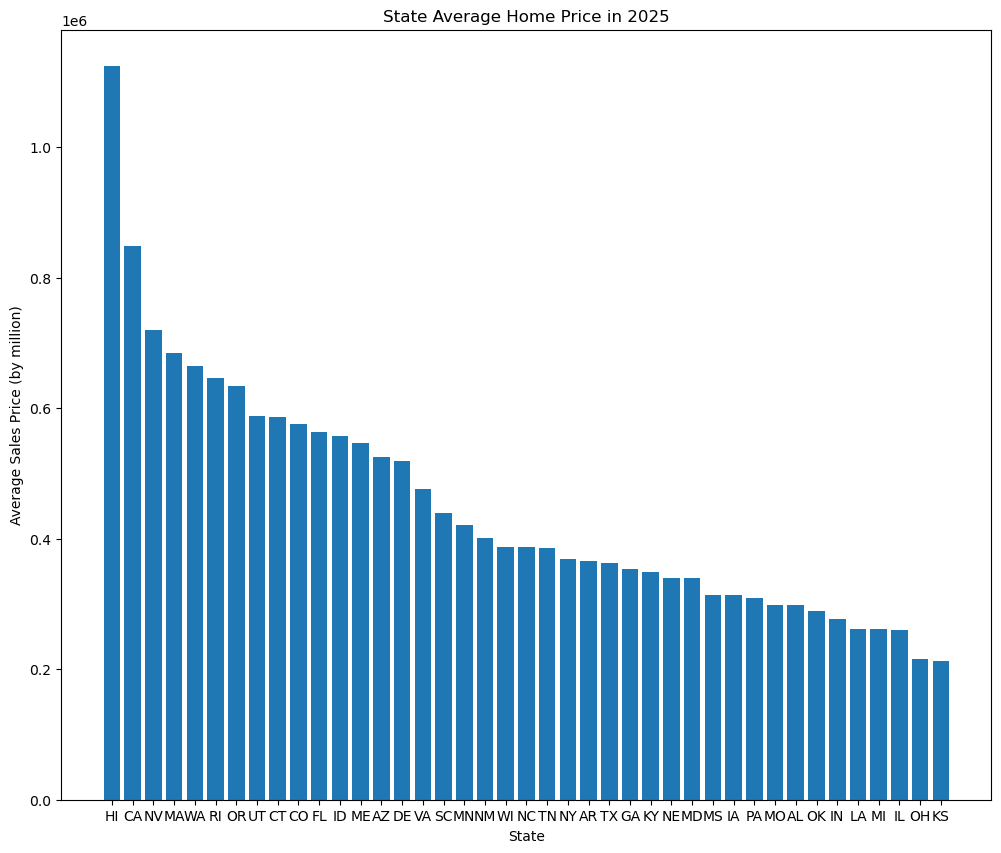

In [15]:
#filter for current prices
state_2025 = state_means[state_means['year'] == 2025]

#plot sales price
fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(state_2025.state, state_2025.mean_sales_price)
plt.xlabel('State')
plt.ylabel('Average Sales Price (by million)')
plt.title('State Average Home Price in 2025')
plt.show()

We can see that Hawaii has the highest home prices in 2025 at 1,123,507 USD. California was the only other state over 800K at 848,024 USD.

Now we'll see the average over the entire scope of our data

In [18]:
state_means_total = mean_func(state_means['state'])
state_means_total = state_means_total.reset_index()
state_means_total

state  mean_sales_price  number_of_sales  home_value  market_heat_index  \
0     NC         279976.88           820.56   237582.52              63.54   
1     LA         260140.55           899.22   225785.23              66.25   
2     TX         253207.33           803.56   224386.62              66.45   
3     PA         246633.62           764.94   228522.47              65.00   
4     KY         228354.76           769.83   214263.59              70.33   
5     MI         227189.44           982.00   216201.28              59.60   
6     AZ         225382.42           741.61   198357.99              79.86   
7     FL         225257.28           807.33   195706.54              77.57   
8     MS         224531.70           905.50   212013.82              72.20   
9     OK         224106.63           870.06   213750.29              65.00   
10    IL         223338.70           751.72   210582.58              75.50   
11    TN         222774.84           818.50   201721.48              66.38   
12    SC         222275.28           860.72   190094.90              63.67   
13    AL         221334.27           724.22   199106.66              66.67   
14    NY         221174.37           710.72   191970.15              61.83   
15    IN         219863.31           941.89   208842.82              58.75   
16    MD         218511.87           623.28   208353.50              79.62   
17    GA         217701.73           726.61   203180.56              70.14   
18    NE         216879.14           848.39   205764.04              71.40   
19    AR         216604.86           809.94   196486.81              72.80   
20    MN         214949.89           732.22   192055.14              68.44   
21    MO         211879.11           743.83   199323.83              56.25   
22    WI         207489.19           763.33   187672.49              62.33   
23    OH         206087.30           863.67   200148.41              54.25   
24    IA         205821.42           733.22   199124.28              64.50   
25    KS         205406.93          1078.72   192759.73              84.50   
26    RI         203841.84           682.72   192037.65              68.57   
27    NM         202623.79           846.78   179163.43              62.71   
28    ID         199176.15           802.61   175128.21              58.60   
29    UT         197364.69           665.94   181012.55              69.00   
30    NV         195461.85           655.17   177654.76              77.50   
31    DE         193649.06           614.17   188266.80              95.38   
32    CO         184720.05           645.44   165385.25              65.40   
33    ME         183944.44           667.72   176587.36              60.20   
34    VA         179417.01           602.11   177954.82              58.33   
35    WA         174871.82           626.11   169399.26              70.80   
36    OR         172998.11           649.28   163671.04              63.20   
37    MA         163145.79           618.28   160081.88              62.80   
38    CT         153125.89           687.89   132531.31              53.70   
39    CA         147826.80           578.28   139994.38              58.00   
40    HI         113388.97           443.78   119381.28                NaN   

    value_surplus  pop_rank  
0        42394.36     67.44  
1        34355.32     64.17  
2        28820.70     67.56  
3        18111.15     65.22  
4        14091.17     67.44  
5        10988.17     66.89  
6        27024.43     70.00  
7        29550.74     69.56  
8        12517.88     66.89  
9        10356.34     66.56  
10       12756.12     65.78  
11       21053.36     69.56  
12       32180.38     68.28  
13       22227.61     62.89  
14       29204.22     67.11  
15       11020.49     66.89  
16       10158.37     66.61  
17       14521.17     67.44  
18       11115.10     67.17  
19       20118.05     65.56  
20       22894.74     69.78  
21       12555.29     65.67  
22       19816.71     67.33  
23    

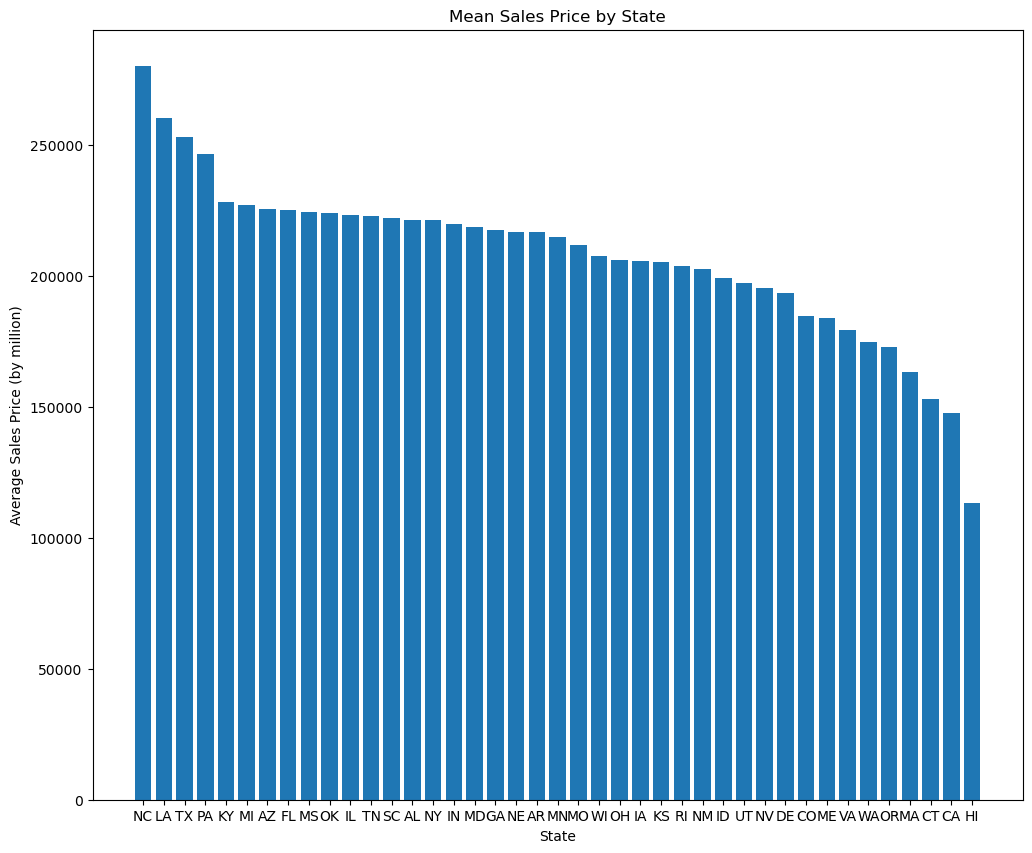

In [19]:
#plot data by state means
fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(state_means_total.state, state_means_total.mean_sales_price)
plt.xlabel('State')
plt.ylabel('Average Sales Price (by million)')
plt.title('Mean Sales Price by State')
plt.show()

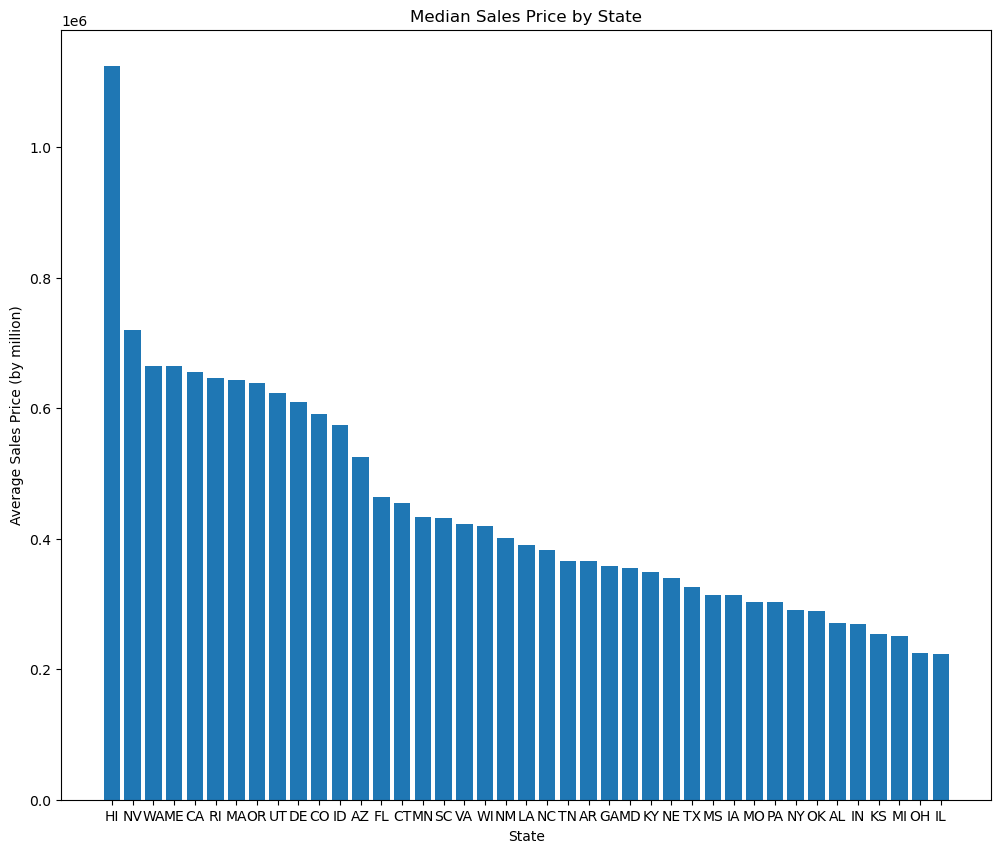

In [20]:
#plot data by state median price
fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(state_medians.state, state_medians.mean_sales_price)
plt.xlabel('State')
plt.ylabel('Average Sales Price (by million)')
plt.title('Median Sales Price by State')
plt.show()

Hawaii by far has the highest mean/median sales price. Other states are all at around 750K or lower while Hawaii is over 1M. California seems to decrease most from mean to median

In [22]:
#analyze data by year
year_mean = mean_func('year')
year_mean = year_mean.sort_values('year', ascending=False)
year_mean

mean_sales_price  number_of_sales  home_value  market_heat_index  \
year                                                                     
2025         461108.46          1551.01   391514.89              56.01   
2024         463510.19          2108.36   386406.66              58.94   
2023         438896.68          2112.46   371409.54              65.20   
2022         429329.65          2794.72   365981.27              70.10   
2021         391022.98          3492.19   318623.02              79.62   
2020         334694.80          2938.86   275304.76              70.02   
2019         302456.71          2817.74   260287.41              52.48   
2018         294243.32          2846.73   251077.85              48.79   
2017         276543.86          2941.44   235212.60                NaN   
2016         258708.56          2867.36   221530.60                NaN   
2015         247838.08          2736.26   208249.78                NaN   
2014         237466.21          2492.59   196932.00                NaN   
2013         225283.74          2533.89   183489.00                NaN   
2012         209266.41          2228.08   171168.09                NaN   
2011         202533.88          1963.58   173810.67                NaN   
2010         208980.88          1944.08   184350.57                NaN   
2009         202041.17          1995.92   190323.10                NaN   
2008         239412.78          1908.91   210851.22                NaN   

      value_surplus  pop_rank  
year                           
2025       69593.57     77.48  
2024       77103.53     77.48  
2023       67487.14     77.48  
2022       63348.38     77.48  
2021       72399.96     77.48  
2020       59390.05     77.48  
2019       42169.31     77.48  
2018       43165.46     76.12  
2017       41331.26     75.07  
2016       37177.96     74.90  
2015       39588.30     74.90  
2014       40534.21     74.90  
2013       41794.74     74.90  
2012       38098.32     74.87  
2011       28723.21     73.88  
2010       24630.31     73.62  
2009       11718.07     72.37  
2008       28561.56     73.60

In [23]:
#analyze data by year
year_median = median_func('year')
year_median = year_median.sort_values('year', ascending=False)
year_median

mean_sales_price  number_of_sales  home_value  market_heat_index  \
year                                                                     
2025         384251.00            942.0   343684.38               53.5   
2024         389794.98           1304.0   338030.71               56.0   
2023         367198.00           1296.5   321173.79               63.0   
2022         352211.58           1684.0   307538.66               67.0   
2021         319498.75           2084.0   267536.68               76.0   
2020         273379.62           1826.5   234786.17               68.5   
2019         247379.30           1701.0   222277.42               53.0   
2018         237773.00           1696.5   212428.95               48.0   
2017         224393.72           1726.0   199482.18                NaN   
2016         213532.70           1693.0   185114.86                NaN   
2015         204391.92           1629.5   173411.41                NaN   
2014         194987.88           1529.0   165336.93                NaN   
2013         187819.12           1513.5   154892.11                NaN   
2012         174703.00           1316.0   144279.72                NaN   
2011         169170.88           1089.5   143144.64                NaN   
2010         175496.00           1055.0   152701.00                NaN   
2009         174175.68           1128.0   165989.24                NaN   
2008         201977.60           1115.5   187772.64                NaN   

      value_surplus  pop_rank  
year                           
2025       52635.06      72.5  
2024       57370.89      72.5  
2023       48890.49      72.5  
2022       46101.95      72.5  
2021       52750.42      72.5  
2020       44088.08      72.5  
2019       32994.57      72.5  
2018       32850.17      72.0  
2017       31315.94      71.0  
2016       29529.26      70.5  
2015       28916.80      70.5  
2014       28814.71      70.5  
2013       29930.04      70.5  
2012       28220.64      70.0  
2011       20572.91      69.5  
2010       16501.84      70.0  
2009        8135.15      69.0  
2008       12079.40      69.0

In [24]:
zillow_df['year'].value_counts()

year
2021    1680
2022    1680
2020    1680
2019    1680
2023    1680
2024    1680
2018    1661
2017    1636
2015    1632
2014    1632
2013    1632
2016    1632
2012    1631
2011    1608
2010    1592
2009    1570
2008    1460
2025     140
Name: count, dtype: int64

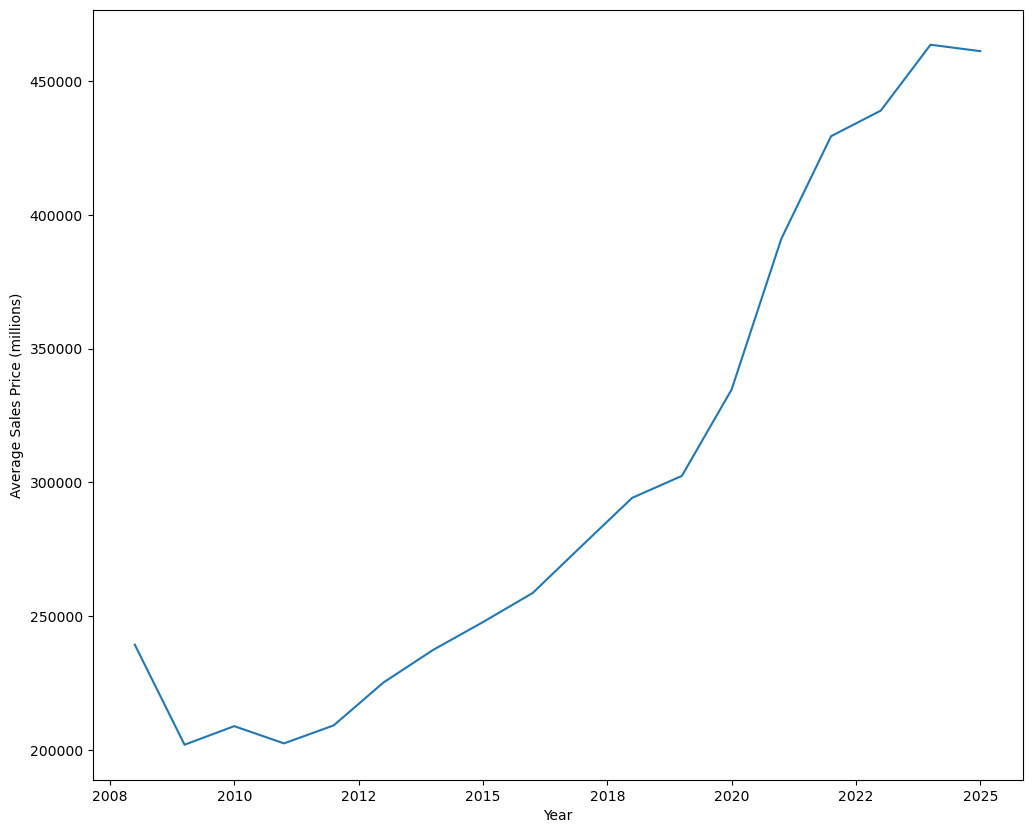

In [25]:
#lineplot of year mean data
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(year_mean.index, year_mean.mean_sales_price)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Year')
plt.ylabel('Average Sales Price (millions)')
plt.show()

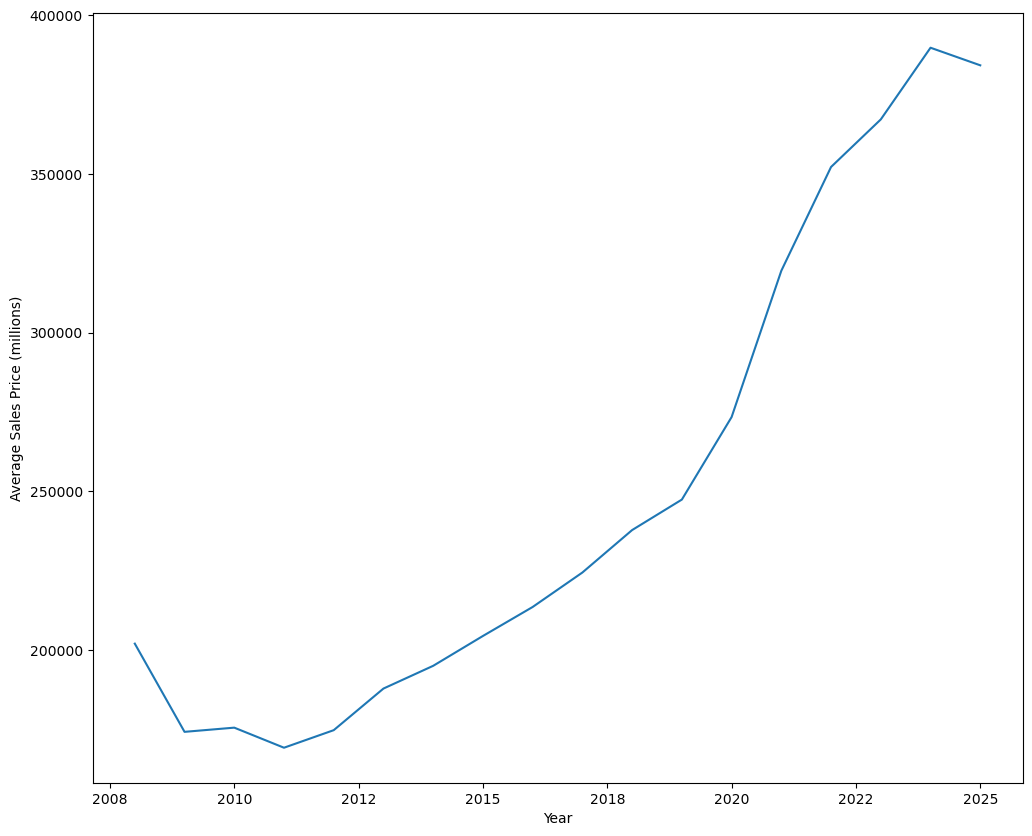

In [26]:
#lineplot of year median data
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(year_median.index, year_median.mean_sales_price)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('Year')
plt.ylabel('Average Sales Price (millions)')
plt.show()

As expected, price increases steeply by year. After the 2008 recession we see a small dip for the next 3-4 years before increasing moderatly until 2020. After covid in 2020, the increase is steeper leading up to 2024 

In [28]:
#analyze monthly data
month_mean = mean_func('month')
month_mean = month_mean.sort_values('month')
month_mean

mean_sales_price  number_of_sales  home_value  market_heat_index  \
month                                                                     
1             287576.18          1826.33   253418.10              64.36   
2             275373.90          1870.42   244219.90              69.79   
3             285393.30          2460.65   245361.04              70.60   
4             293005.80          2560.61   246627.91              70.35   
5             300857.69          2815.87   247836.60              67.79   
6             308603.04          3064.36   248885.81              65.09   
7             306750.55          2910.82   249611.72              63.27   
8             302256.70          2905.11   250429.49              61.17   
9             296025.57          2576.81   250923.41              58.08   
10            294186.65          2552.70   251286.88              55.73   
11            292058.81          2254.76   251940.52              55.63   
12            292095.78          2350.20   252729.40              60.38   

       value_surplus  pop_rank  
month                           
1           34158.09     75.61  
2           31154.00     75.72  
3           40032.26     75.72  
4           46377.90     75.72  
5           53021.09     75.72  
6           59717.24     75.72  
7           57138.83     75.74  
8           51827.21     75.33  
9           45102.16     75.36  
10          42899.77     75.40  
11          40118.29     75.48  
12          39366.38     75.48

In [29]:
month_median = median_func('month')
month_median = month_median.sort_values('month')
month_median

mean_sales_price  number_of_sales  home_value  market_heat_index  \
month                                                                     
1             224095.80           1044.5   202249.16               60.0   
2             215254.75           1088.0   197237.57               66.0   
3             222319.00           1450.5   198078.09               68.0   
4             229386.80           1528.0   198871.35               69.0   
5             237080.75           1692.5   199379.69               67.0   
6             244619.75           1810.5   200076.16               64.0   
7             244115.00           1709.0   200266.29               61.0   
8             241057.75           1690.0   201461.15               59.0   
9             233321.75           1490.0   201781.38               56.0   
10            231568.82           1499.0   201871.66               54.0   
11            230609.50           1314.0   202284.49               53.5   
12            230470.00           1355.0   202251.06               57.0   

       value_surplus  pop_rank  
month                           
1           21580.69      71.0  
2           18885.38      71.0  
3           25087.34      71.0  
4           29990.17      71.0  
5           36236.88      71.0  
6           43228.82      71.0  
7           43010.46      71.0  
8           38300.77      71.0  
9           32624.86      71.0  
10          29968.23      71.0  
11          27933.76      71.0  
12          27385.72      71.0

In [30]:
zillow_df['month'].value_counts()

month
7     2330
2     2329
4     2329
3     2329
5     2329
6     2329
1     2327
11    2323
12    2323
10    2322
9     2319
8     2317
Name: count, dtype: int64

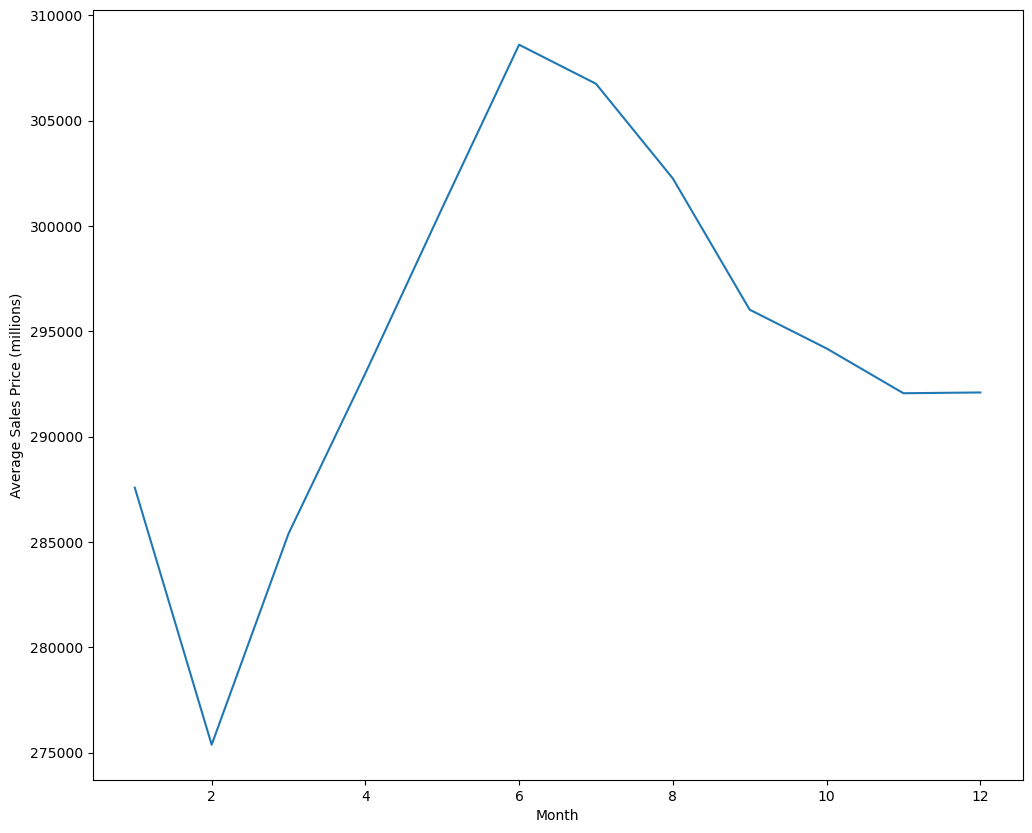

In [31]:
#lineplot of month mean data
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(month_mean.index, month_mean.mean_sales_price)
plt.xlabel('Month')
plt.ylabel('Average Sales Price (millions)')
plt.show()

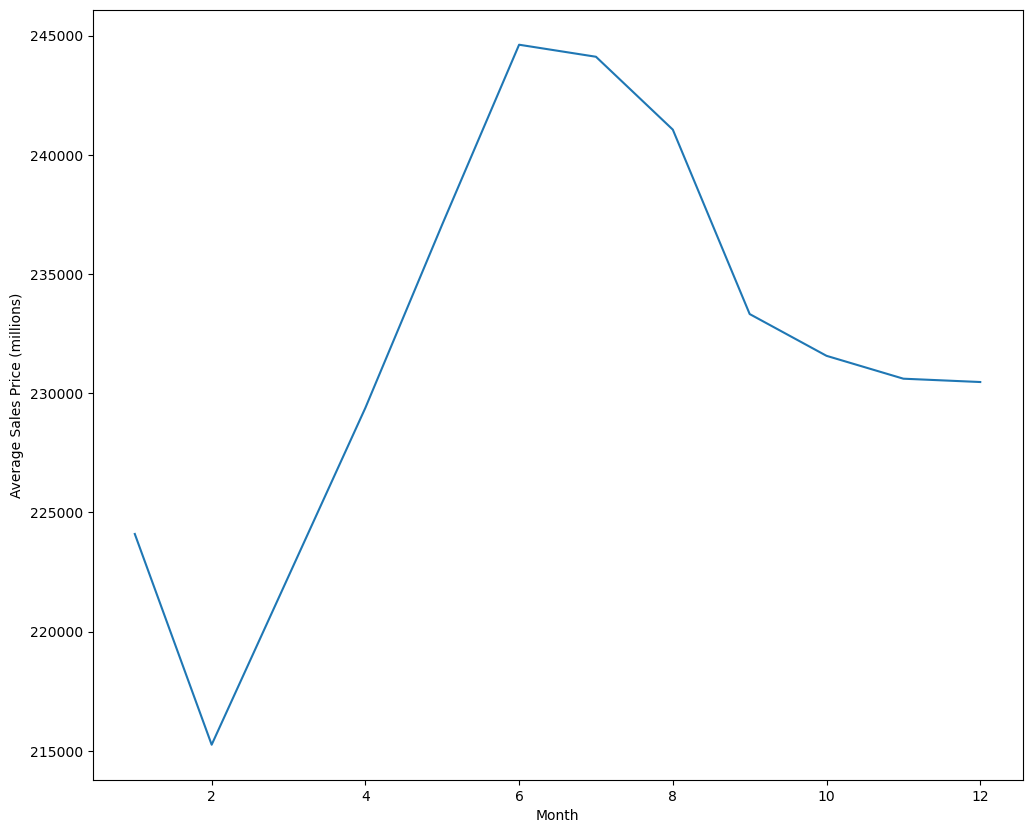

In [32]:
#lineplot of month median data
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(month_median.index, month_median.mean_sales_price)
plt.xlabel('Month')
plt.ylabel('Average Sales Price (millions)')
plt.show()

January data is slightly skewed because it is the only month that also has 2025 data. Interestingly the data peaks around June of each year and levels off by December. The increases are very small for house prices (less than 10% through highest and lowest peaks). Is this related to number of sales per month?

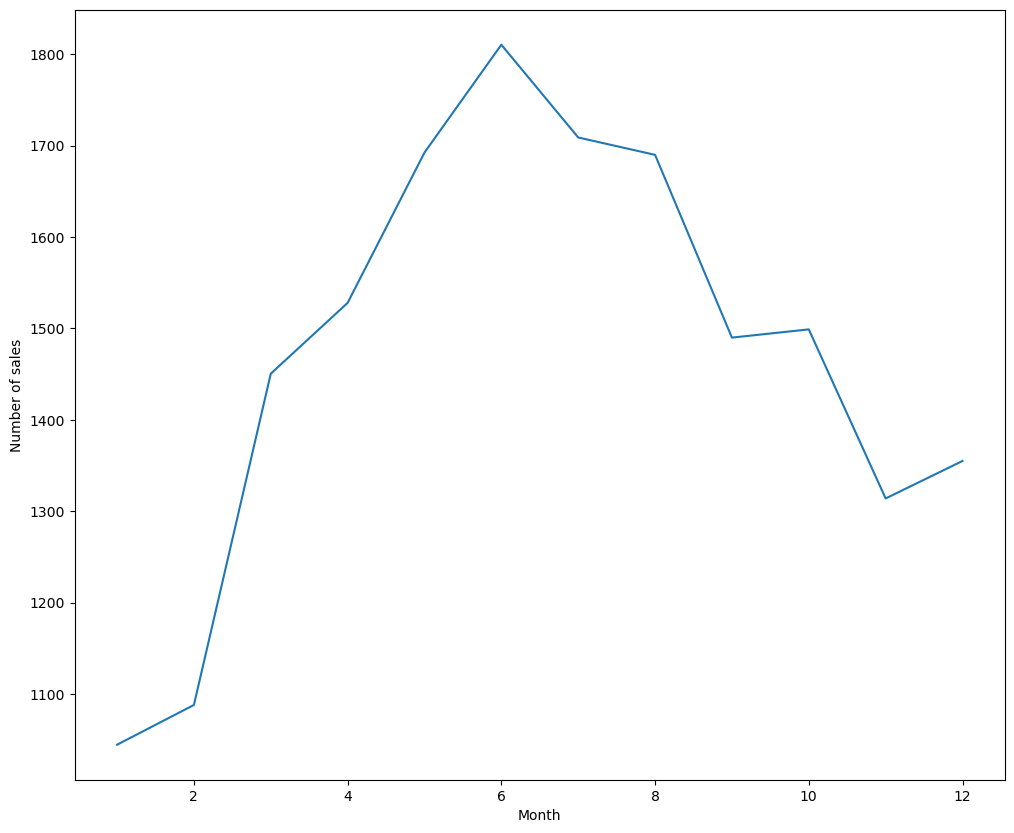

In [34]:
#number of sales by month
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(month_median.index, month_median.number_of_sales)
plt.xlabel('Month')
plt.ylabel('Number of sales')
plt.show()

We can see that the number of sales per month increases around 80% between January and June. This chart closely resembles the mean sales price meaning the 8-10% jump from Feb to June could be a result of larger sample size

In [36]:
#create bins for population rank data
pr_bins = [0, 25, 50, 75, 100, 125, 150, 175, 200, zillow_df['pop_rank'].max()]
pr_labels = ['25', '50', '75', '100', '125', '150', '175', '200', '300']

In [37]:
#sort by size rank
pop_rank_mean = mean_func('pop_rank')
pop_rank_mean['binned'] = pd.cut(pop_rank_mean.index, pr_bins, labels=pr_labels)
pop_rank_mean = pop_rank_mean.groupby(['binned']).mean().round(2).sort_values('binned')
pop_rank_mean

/var/folders/95/yr6zk14d0rb52tgyfy426wwh0000gn/T/ipykernel_39827/1742801620.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_rank_mean = pop_rank_mean.groupby(['binned']).mean().round(2).sort_values('binned')


mean_sales_price  number_of_sales  home_value  market_heat_index  \
binned                                                                     
25             402742.84          5654.05   333645.68              67.44   
50             300945.41          1978.76   258845.60              68.75   
75             303072.47           985.59   253552.60              65.17   
100            232826.01           877.57   206020.30              63.15   
125            255204.45              NaN   225864.44              60.93   
150            249538.96              NaN   192904.36              54.52   
175            221329.81           494.58   198116.58              59.02   
200            438156.52              NaN   258506.00              51.18   
300            405005.04              NaN   316940.45              53.01   

        value_surplus  pop_rank  
binned                           
25           69097.17     13.00  
50           42099.81     37.83  
75           49519.87     62.54  
100          26805.71     88.41  
125          29340.01    111.48  
150          56634.60    135.69  
175          23213.24    159.75  
200         179650.52    176.00  
300          88064.59    215.67

In [38]:
pop_rank_median = median_func('pop_rank')
pop_rank_median['binned'] = pd.cut(pop_rank_median.index, pr_bins, labels=pr_labels)
pop_rank_median = pop_rank_median.groupby(['binned']).mean().round(2).sort_values('binned')
pop_rank_median

/var/folders/95/yr6zk14d0rb52tgyfy426wwh0000gn/T/ipykernel_39827/2265002060.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pop_rank_median = pop_rank_median.groupby(['binned']).mean().round(2).sort_values('binned')


mean_sales_price  number_of_sales  home_value  market_heat_index  \
binned                                                                     
25             371239.55          5497.54   307611.04              65.52   
50             274124.47          1944.00   233982.76              67.13   
75             274517.93           960.48   231296.28              63.71   
100            208272.48           830.79   182110.37              61.45   
125            229925.47              NaN   206081.93              59.05   
150            234640.77              NaN   175214.75              52.15   
175            202257.88           488.00   181630.19              56.88   
200            370492.00              NaN   227148.94              49.00   
300            374795.00              NaN   289157.14              49.67   

        value_surplus  pop_rank  
binned                           
25           65617.10     13.00  
50           39437.54     37.83  
75           44656.81     62.54  
100          24417.98     88.41  
125          25639.98    111.48  
150          52831.83    135.69  
175          19955.51    159.75  
200         147575.53    176.00  
300          76121.64    215.67

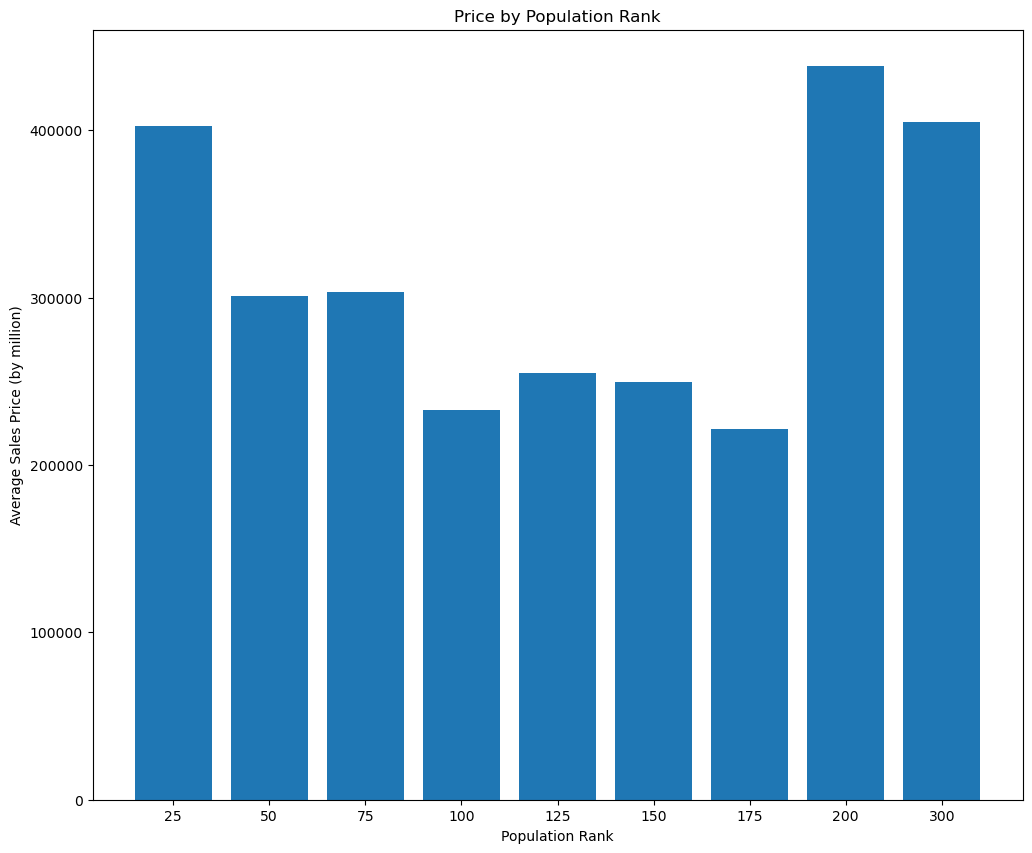

In [39]:
#chart for size rank by mean_sales_price
fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(pop_rank_mean.index, pop_rank_mean.mean_sales_price)
plt.xlabel('Population Rank')
plt.ylabel('Average Sales Price (by million)')
plt.title('Price by Population Rank')
plt.show()

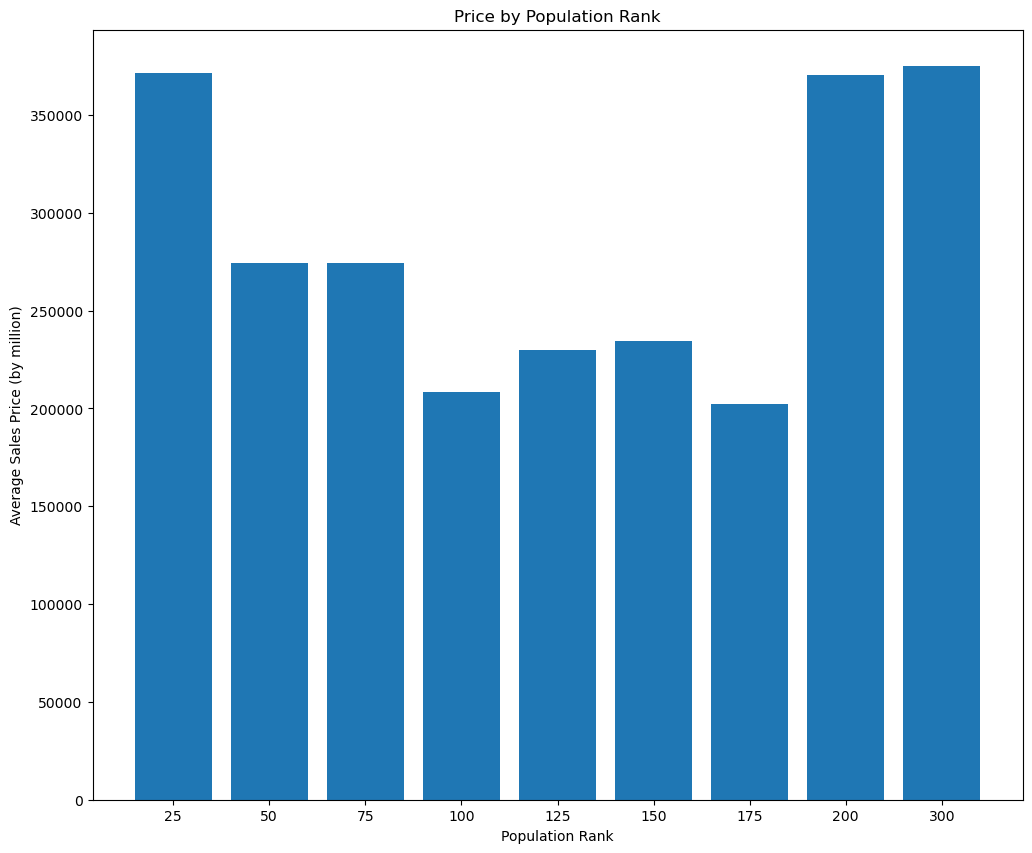

In [40]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(pop_rank_median.index, pop_rank_median.mean_sales_price)
plt.xlabel('Population Rank')
plt.ylabel('Average Sales Price (by million)')
plt.title('Price by Population Rank')
plt.show()

These charts are being affected heavily by outliers in smaller population rank cities.

In [42]:
#look at outliers in 250+ population rank
pop_200 = zillow_df[zillow_df['pop_rank'] > 200]
pop_200

pop_rank                 city state  month  year  mean_sales_price  \
1836        202  Barnstable Town, MA    MA      2  2008         391760.00   
1837        202  Barnstable Town, MA    MA      3  2008         391760.00   
1838        202  Barnstable Town, MA    MA      4  2008         391760.00   
1839        202  Barnstable Town, MA    MA      5  2008         391760.00   
1840        202  Barnstable Town, MA    MA      6  2008         391760.00   
...         ...                  ...   ...    ...   ...               ...   
17217       242      Panama City, FL    FL      9  2024         374456.25   
17218       242      Panama City, FL    FL     10  2024         407064.00   
17219       242      Panama City, FL    FL     11  2024         381162.20   
17220       242      Panama City, FL    FL     12  2024         389702.75   
17221       242      Panama City, FL    FL      1  2025         312771.00   

       number_of_sales     home_value  market_heat_index  value_surplus  
1836               NaN  409014.645710                NaN  -17254.645710  
1837               NaN  409016.490526                NaN  -17256.490526  
1838               NaN  407852.345781                NaN  -16092.345781  
1839               NaN  405367.149787                NaN  -13607.149787  
1840               NaN  403645.319477                NaN  -11885.319477  
...                ...            ...                ...            ...  
17217              NaN  316787.427945               28.0   57668.822055  
17218              NaN  315957.827915               27.0   91106.172085  
17219              NaN  315282.295717               27.0   65879.904283  
17220              NaN  315400.209414               28.0   74302.540586  
17221              NaN  316410.970506               29.0   -3639.970506  

[465 rows x 10 columns]

In [43]:
pop_200.describe()

pop_rank       month         year  mean_sales_price  number_of_sales  \
count  465.000000  465.000000   465.000000      4.650000e+02              0.0   
mean   209.367742    6.432258  2017.230108      4.245218e+05              NaN   
std     15.010350    3.441042     4.795467      1.980091e+05              NaN   
min    202.000000    1.000000  2008.000000      1.272062e+05              NaN   
25%    202.000000    3.000000  2013.000000      2.610380e+05              NaN   
50%    203.000000    6.000000  2018.000000      4.109788e+05              NaN   
75%    203.000000    9.000000  2021.000000      4.940422e+05              NaN   
max    242.000000   12.000000  2025.000000      1.086138e+06              NaN   

          home_value  market_heat_index  value_surplus  
count     465.000000         245.000000     465.000000  
mean   333152.099346          53.314286   91369.683987  
std    148679.338230          20.779956   69108.622316  
min    150819.217818          10.000000  -34740.304510  
25%    203453.709804          38.000000   41754.283025  
50%    324657.297270          50.000000   80047.427293  
75%    386731.091738          67.000000  120609.183382  
max    761305.321675         117.000000  326080.603134

In [44]:
pop_200.sort_values('mean_sales_price', ascending=False)

pop_rank                 city state  month  year  mean_sales_price  \
2029       202  Barnstable Town, MA    MA      9  2024        1086138.50   
2033       202  Barnstable Town, MA    MA      1  2025        1078110.00   
2030       202  Barnstable Town, MA    MA     10  2024        1067334.75   
2026       202  Barnstable Town, MA    MA      6  2024        1058076.20   
2018       202  Barnstable Town, MA    MA     10  2023        1027106.00   
...        ...                  ...   ...    ...   ...               ...   
6319       203           Daphne, AL    AL      8  2010         161501.00   
6322       203           Daphne, AL    AL     11  2010         161014.00   
6348       203           Daphne, AL    AL      1  2013         154474.50   
6334       203           Daphne, AL    AL     11  2011         153371.50   
6336       203           Daphne, AL    AL      1  2012         127206.25   

      number_of_sales     home_value  market_heat_index  value_surplus  
2029              NaN  760057.896866               52.0  326080.603134  
2033              NaN  759004.578839               50.0  319105.421161  
2030              NaN  761305.321675               46.0  306029.428325  
2026              NaN  750163.648411               58.0  307912.551589  
2018              NaN  726833.961672               54.0  300272.038328  
...               ...            ...                ...            ...  
6319              NaN  166261.372925                NaN   -4760.372925  
6322              NaN  161863.912922                NaN    -849.912922  
6348              NaN  159330.512150                NaN   -4856.012150  
6334              NaN  151882.684723                NaN    1488.815277  
6336              NaN  150948.227554                NaN  -23741.977554  

[465 rows x 10 columns]

In [45]:
pop_200[pop_200.mean_sales_price > 1000000].sort_values('mean_sales_price', ascending=False)

pop_rank                 city state  month  year  mean_sales_price  \
2029       202  Barnstable Town, MA    MA      9  2024        1086138.50   
2033       202  Barnstable Town, MA    MA      1  2025        1078110.00   
2030       202  Barnstable Town, MA    MA     10  2024        1067334.75   
2026       202  Barnstable Town, MA    MA      6  2024        1058076.20   
2018       202  Barnstable Town, MA    MA     10  2023        1027106.00   
2031       202  Barnstable Town, MA    MA     11  2024        1009340.80   

      number_of_sales     home_value  market_heat_index  value_surplus  
2029              NaN  760057.896866               52.0  326080.603134  
2033              NaN  759004.578839               50.0  319105.421161  
2030              NaN  761305.321675               46.0  306029.428325  
2026              NaN  750163.648411               58.0  307912.551589  
2018              NaN  726833.961672               54.0  300272.038328  
2031              NaN  760505.576076               43.0  248835.223924

While these outliers stick out in this chart, there are only 12 results above 1M so this won't skew data outside of this chart. We can drop the population ranks greater than 200 from the chart and redo.

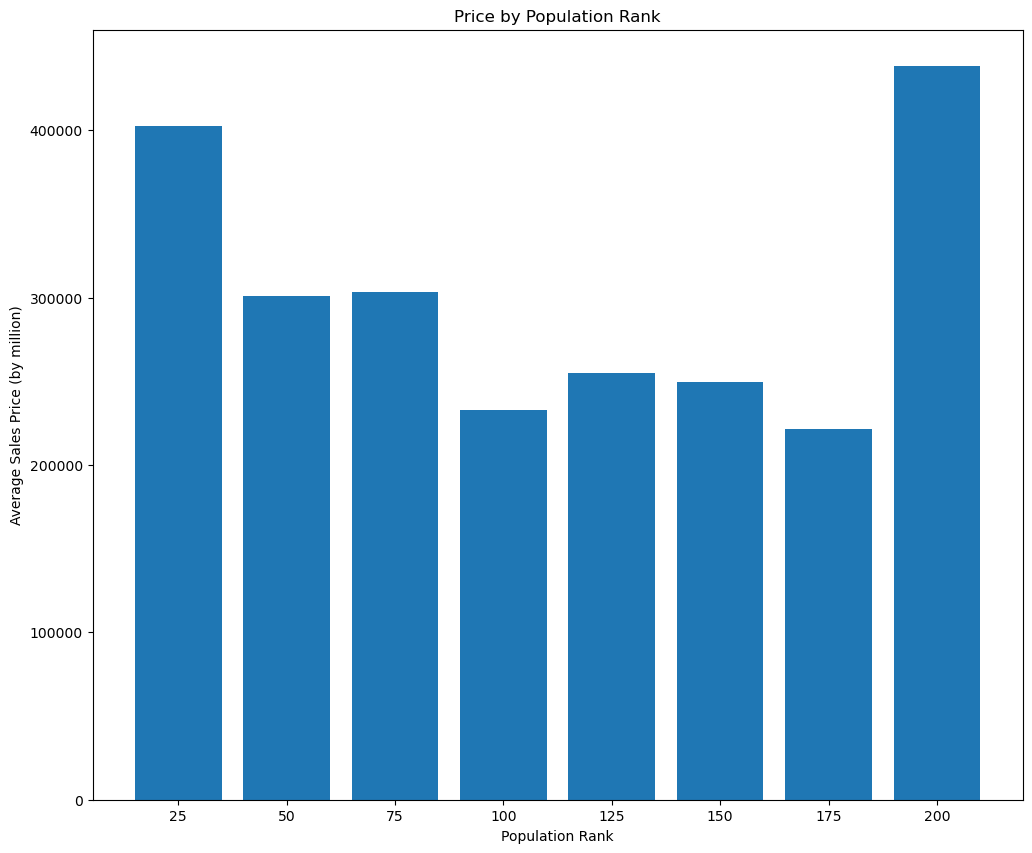

In [47]:
#replot pop_rank_mean without Sante Fe data
pop_rank_mean = pop_rank_mean[pop_rank_mean.pop_rank <= 200]

fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(pop_rank_mean.index, pop_rank_mean.mean_sales_price)
plt.xlabel('Population Rank')
plt.ylabel('Average Sales Price (by million)')
plt.title('Price by Population Rank')
plt.show()

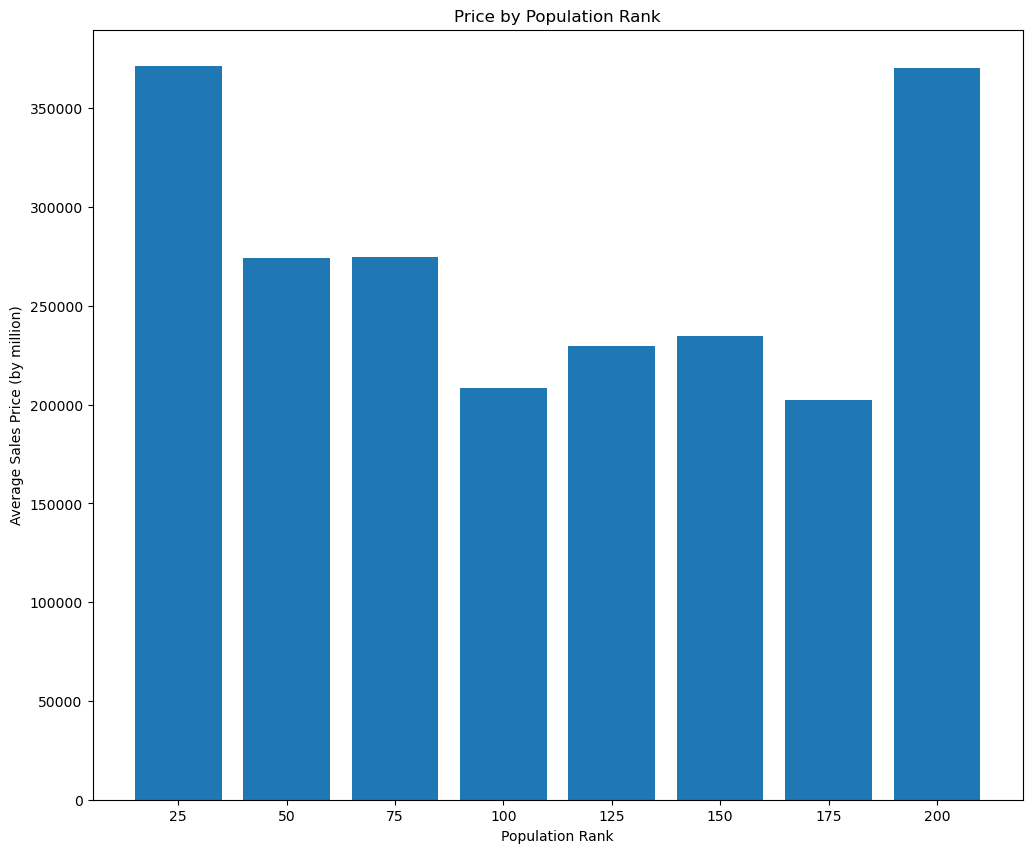

In [48]:
pop_rank_median = pop_rank_median[pop_rank_median.pop_rank <= 200]

fig, ax = plt.subplots(figsize=(12, 10))
plt.bar(pop_rank_median.index, pop_rank_median.mean_sales_price)
plt.xlabel('Population Rank')
plt.ylabel('Average Sales Price (by million)')
plt.title('Price by Population Rank')
plt.show()

We can see that generally price decreases as population shrinks but some of the smallest cities in our dataset jump up.

Distribution of data

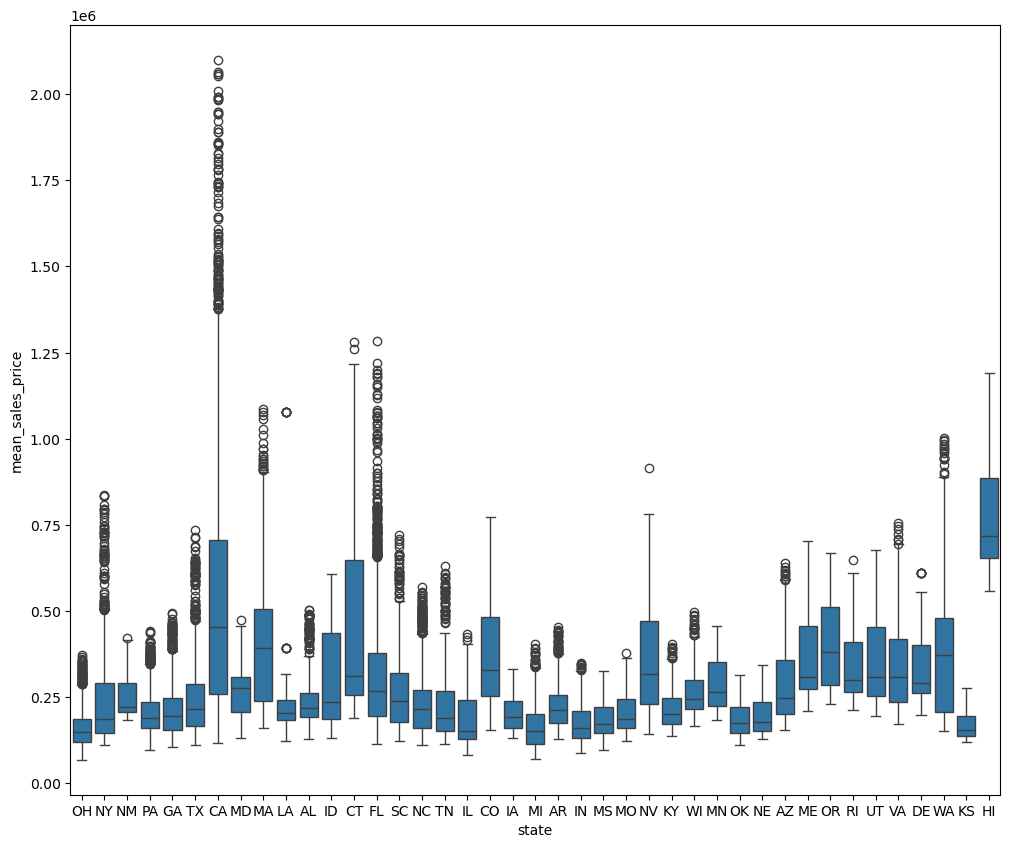

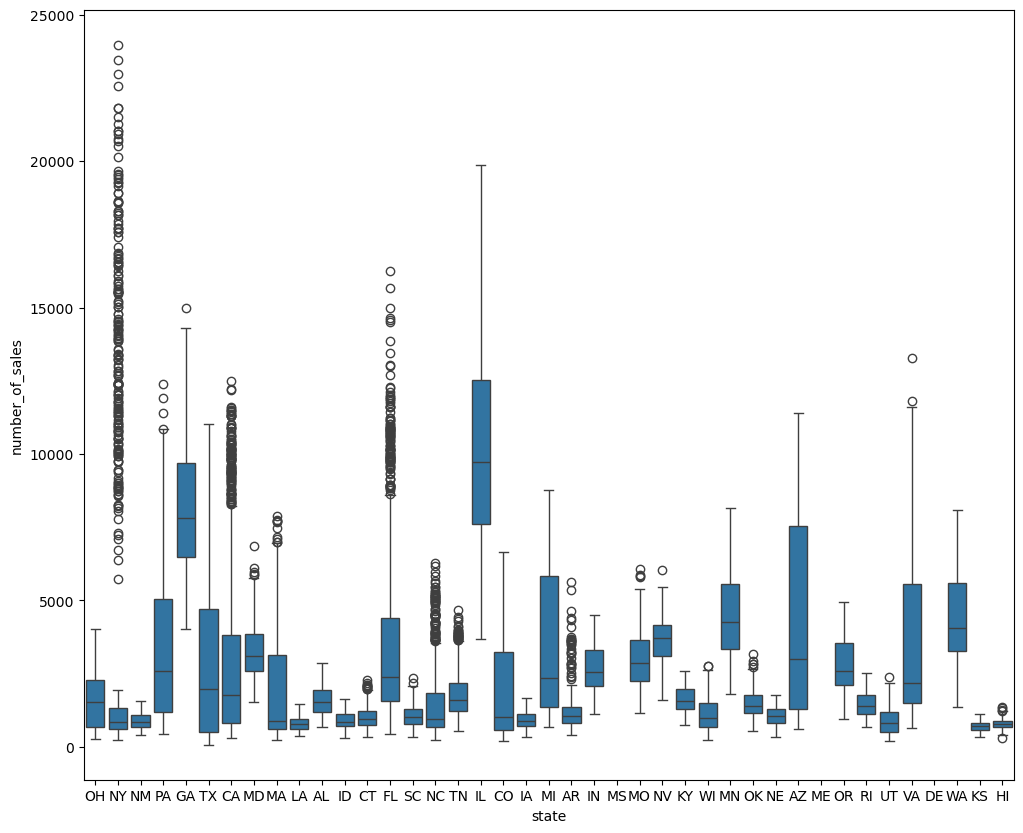

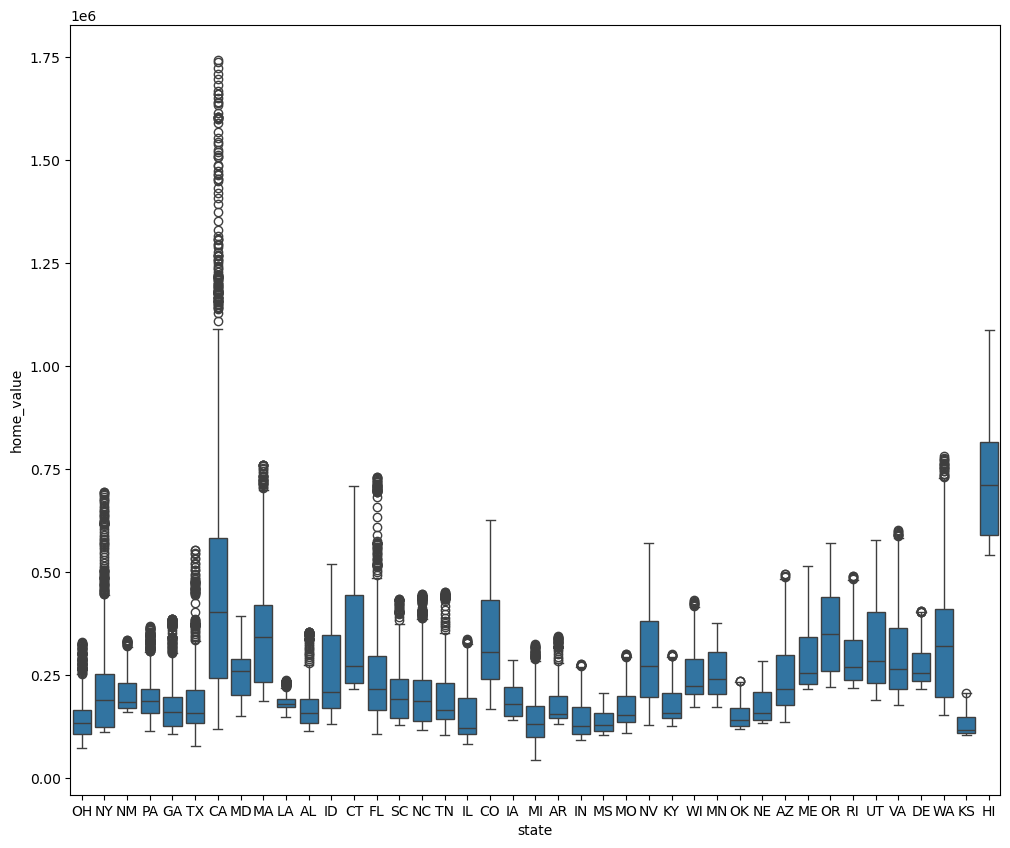

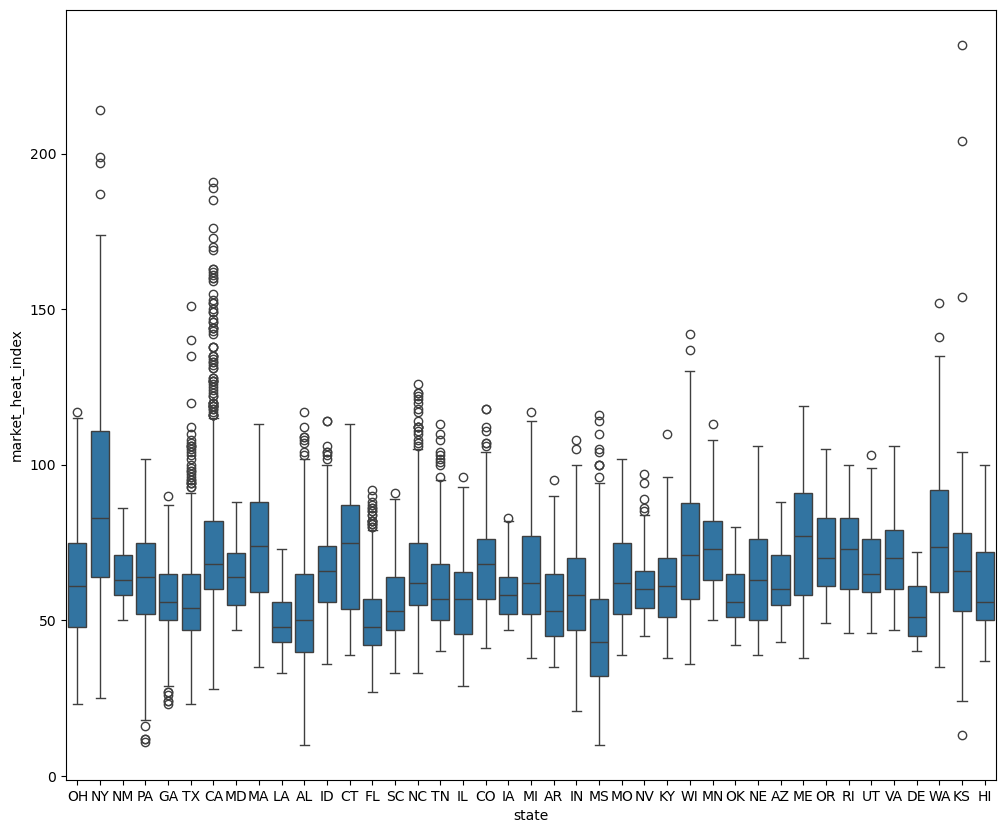

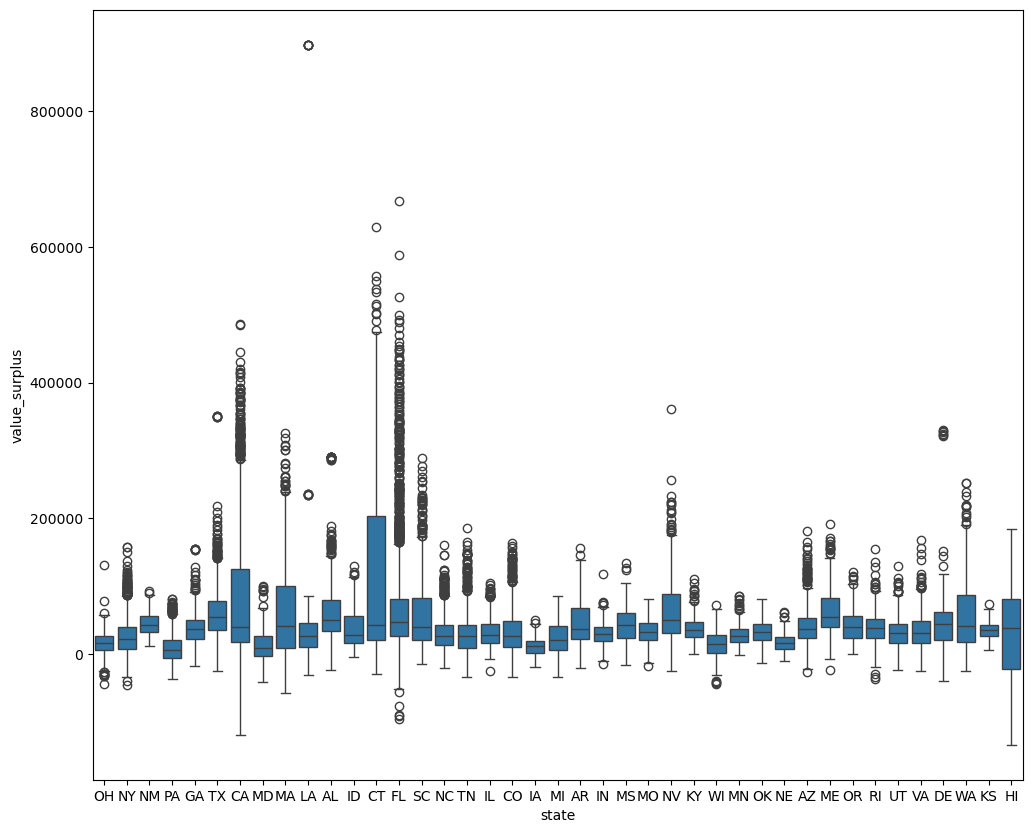

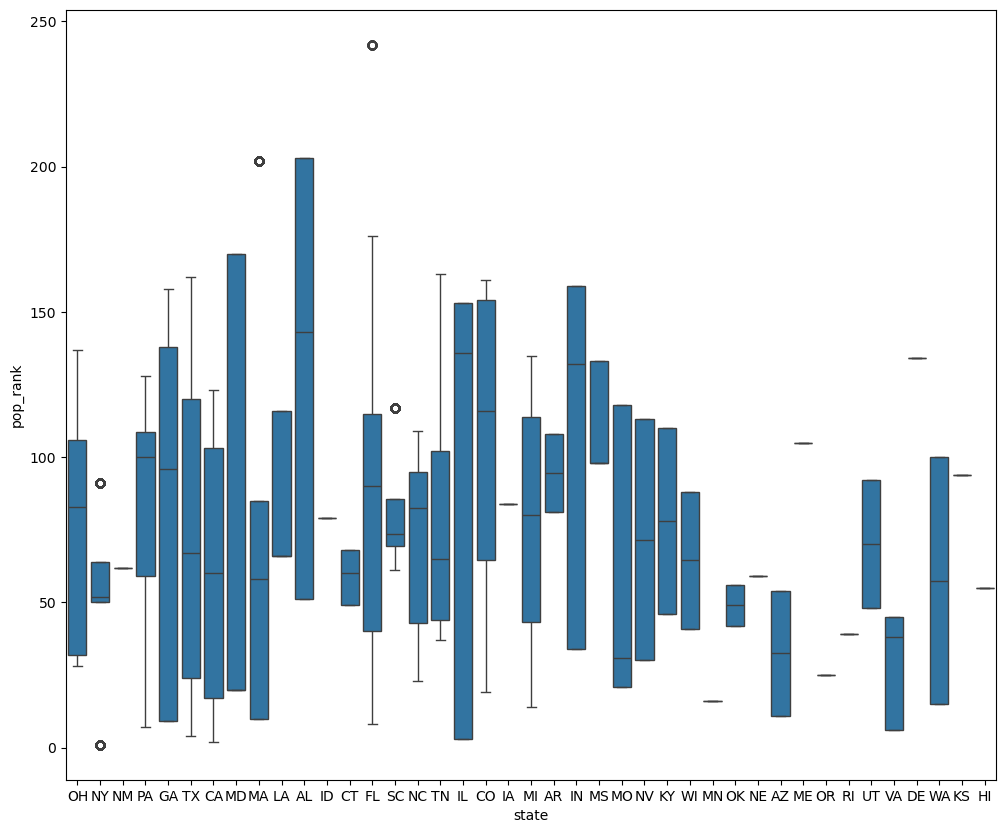

In [51]:
#distribution of data by state
for i in stats_cat:
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.boxplot(data=zillow_df, x='state', y=i)
    plt.show()

These charts show that while the average sales price and home values don't vary extremely, there are a lot of outliers for certain states (specifically NY and CA). Number of sales varies the most by state and still has a lot of outliers in NY, CA, and FL

In [53]:
#ECDF function
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(x)+1) / len(x)
    return x, y

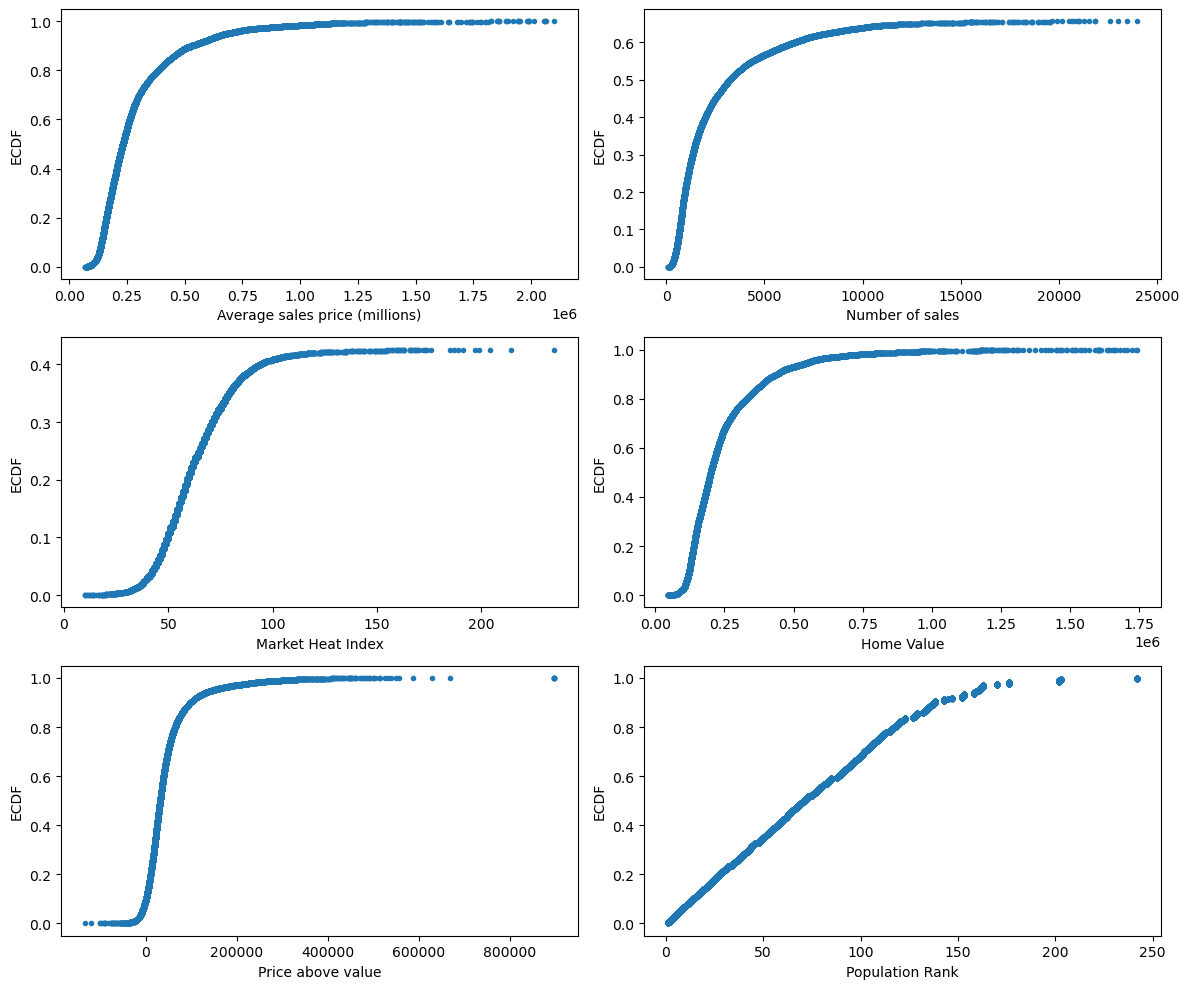

In [54]:
#ECDF distribtuion of numeric data
fig, ax = plt.subplots(3, 2, figsize=(12, 10))
x, y = ecdf(zillow_df['mean_sales_price'])
ax[0, 0].plot(x, y, marker = '.', linestyle = 'none')
ax[0, 0].set_xlabel('Average sales price (millions)')
ax[0, 0].set_ylabel('ECDF')

x, y = ecdf(zillow_df['number_of_sales'])
ax[0, 1].plot(x, y, marker = '.', linestyle = 'none')
ax[0, 1].set_xlabel('Number of sales')
ax[0, 1].set_ylabel('ECDF')

x, y = ecdf(zillow_df['home_value'])
ax[1, 1].plot(x, y, marker = '.', linestyle = 'none')
ax[1, 1].set_xlabel('Home Value')
ax[1, 1].set_ylabel('ECDF')

x, y = ecdf(zillow_df['market_heat_index'])
ax[1, 0].plot(x, y, marker = '.', linestyle = 'none')
ax[1, 0].set_xlabel('Market Heat Index')
ax[1, 0].set_ylabel('ECDF')

x, y = ecdf(zillow_df['value_surplus'])
ax[2, 0].plot(x, y, marker = '.', linestyle = 'none')
ax[2, 0].set_xlabel('Price above value')
ax[2, 0].set_ylabel('ECDF')

x, y = ecdf(zillow_df['pop_rank'])
ax[2, 1].plot(x, y, marker = '.', linestyle = 'none')
ax[2, 1].set_xlabel('Population Rank')
ax[2, 1].set_ylabel('ECDF')

plt.tight_layout()
plt.show()

Generally the distribution of our results doesn't vary much within the first 80-90% of ournumerical data then stretches a lot in the last 10-20% of our dataset. Population rank is more constant which is to be expected since it is a ranking.

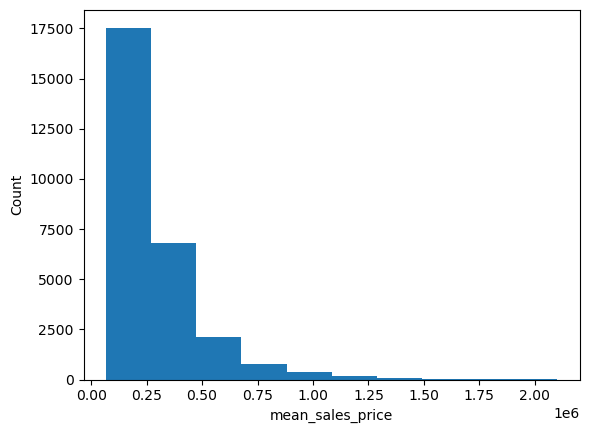

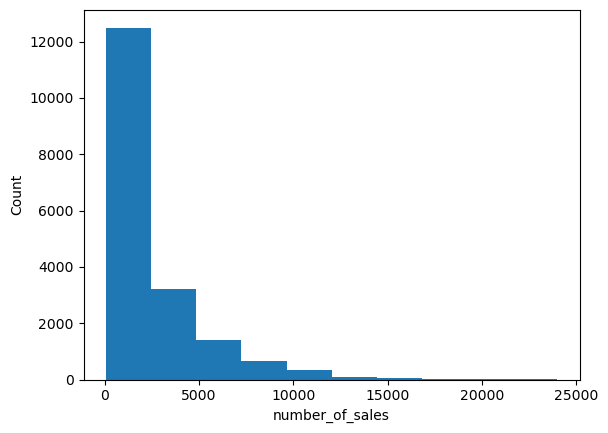

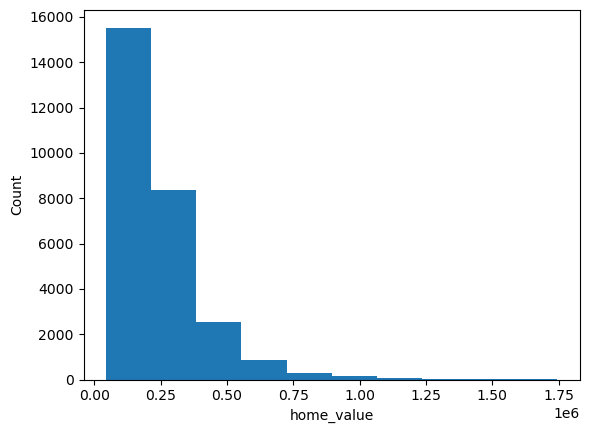

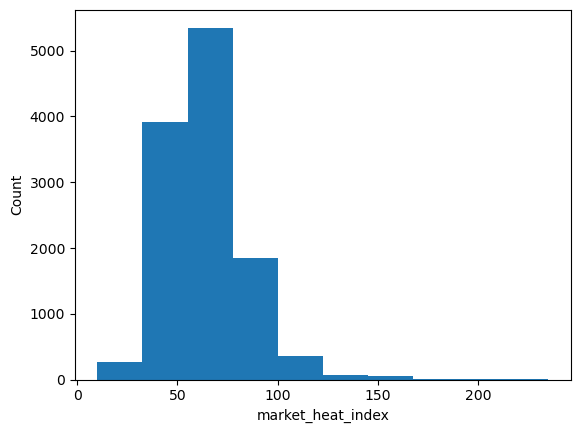

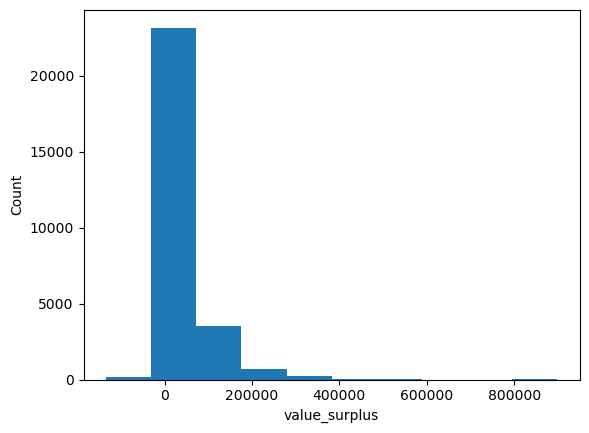

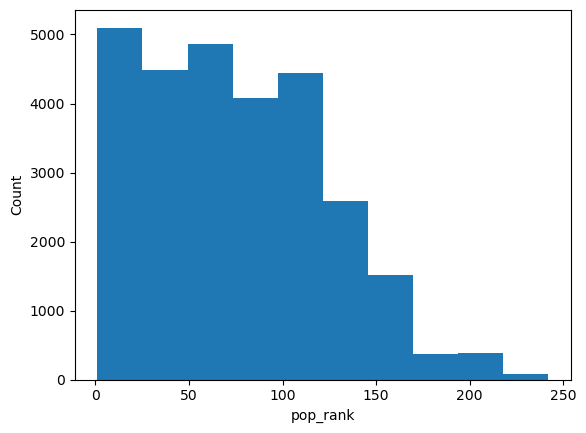

In [56]:
#histogram of data
for i in stats_cat:
    plt.hist(zillow_df[i], bins=10)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

Most of our data is skewed to the left. When using models it will be important to normalize the data to create a normal distribution

Correlation

In [59]:
#non object/id columns for correlation 
numeric_data = zillow_df.drop(['city', 'state'], axis=1)

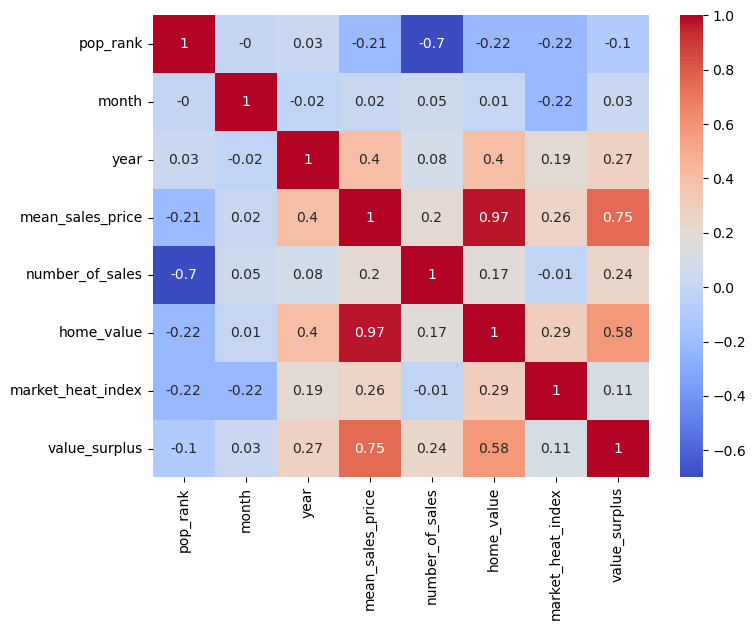

In [60]:
#correlation heatmap
corrmap = numeric_data.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(round(corrmap, 2), annot=True, cmap='coolwarm');

There is a strong correlation between home value and sales price which is expected. The other values positively correlated to our target variable of sales price are value surplue, year, and market heat index. Showing how sales price is related to the year and how much of a buyers/sellers market it is.

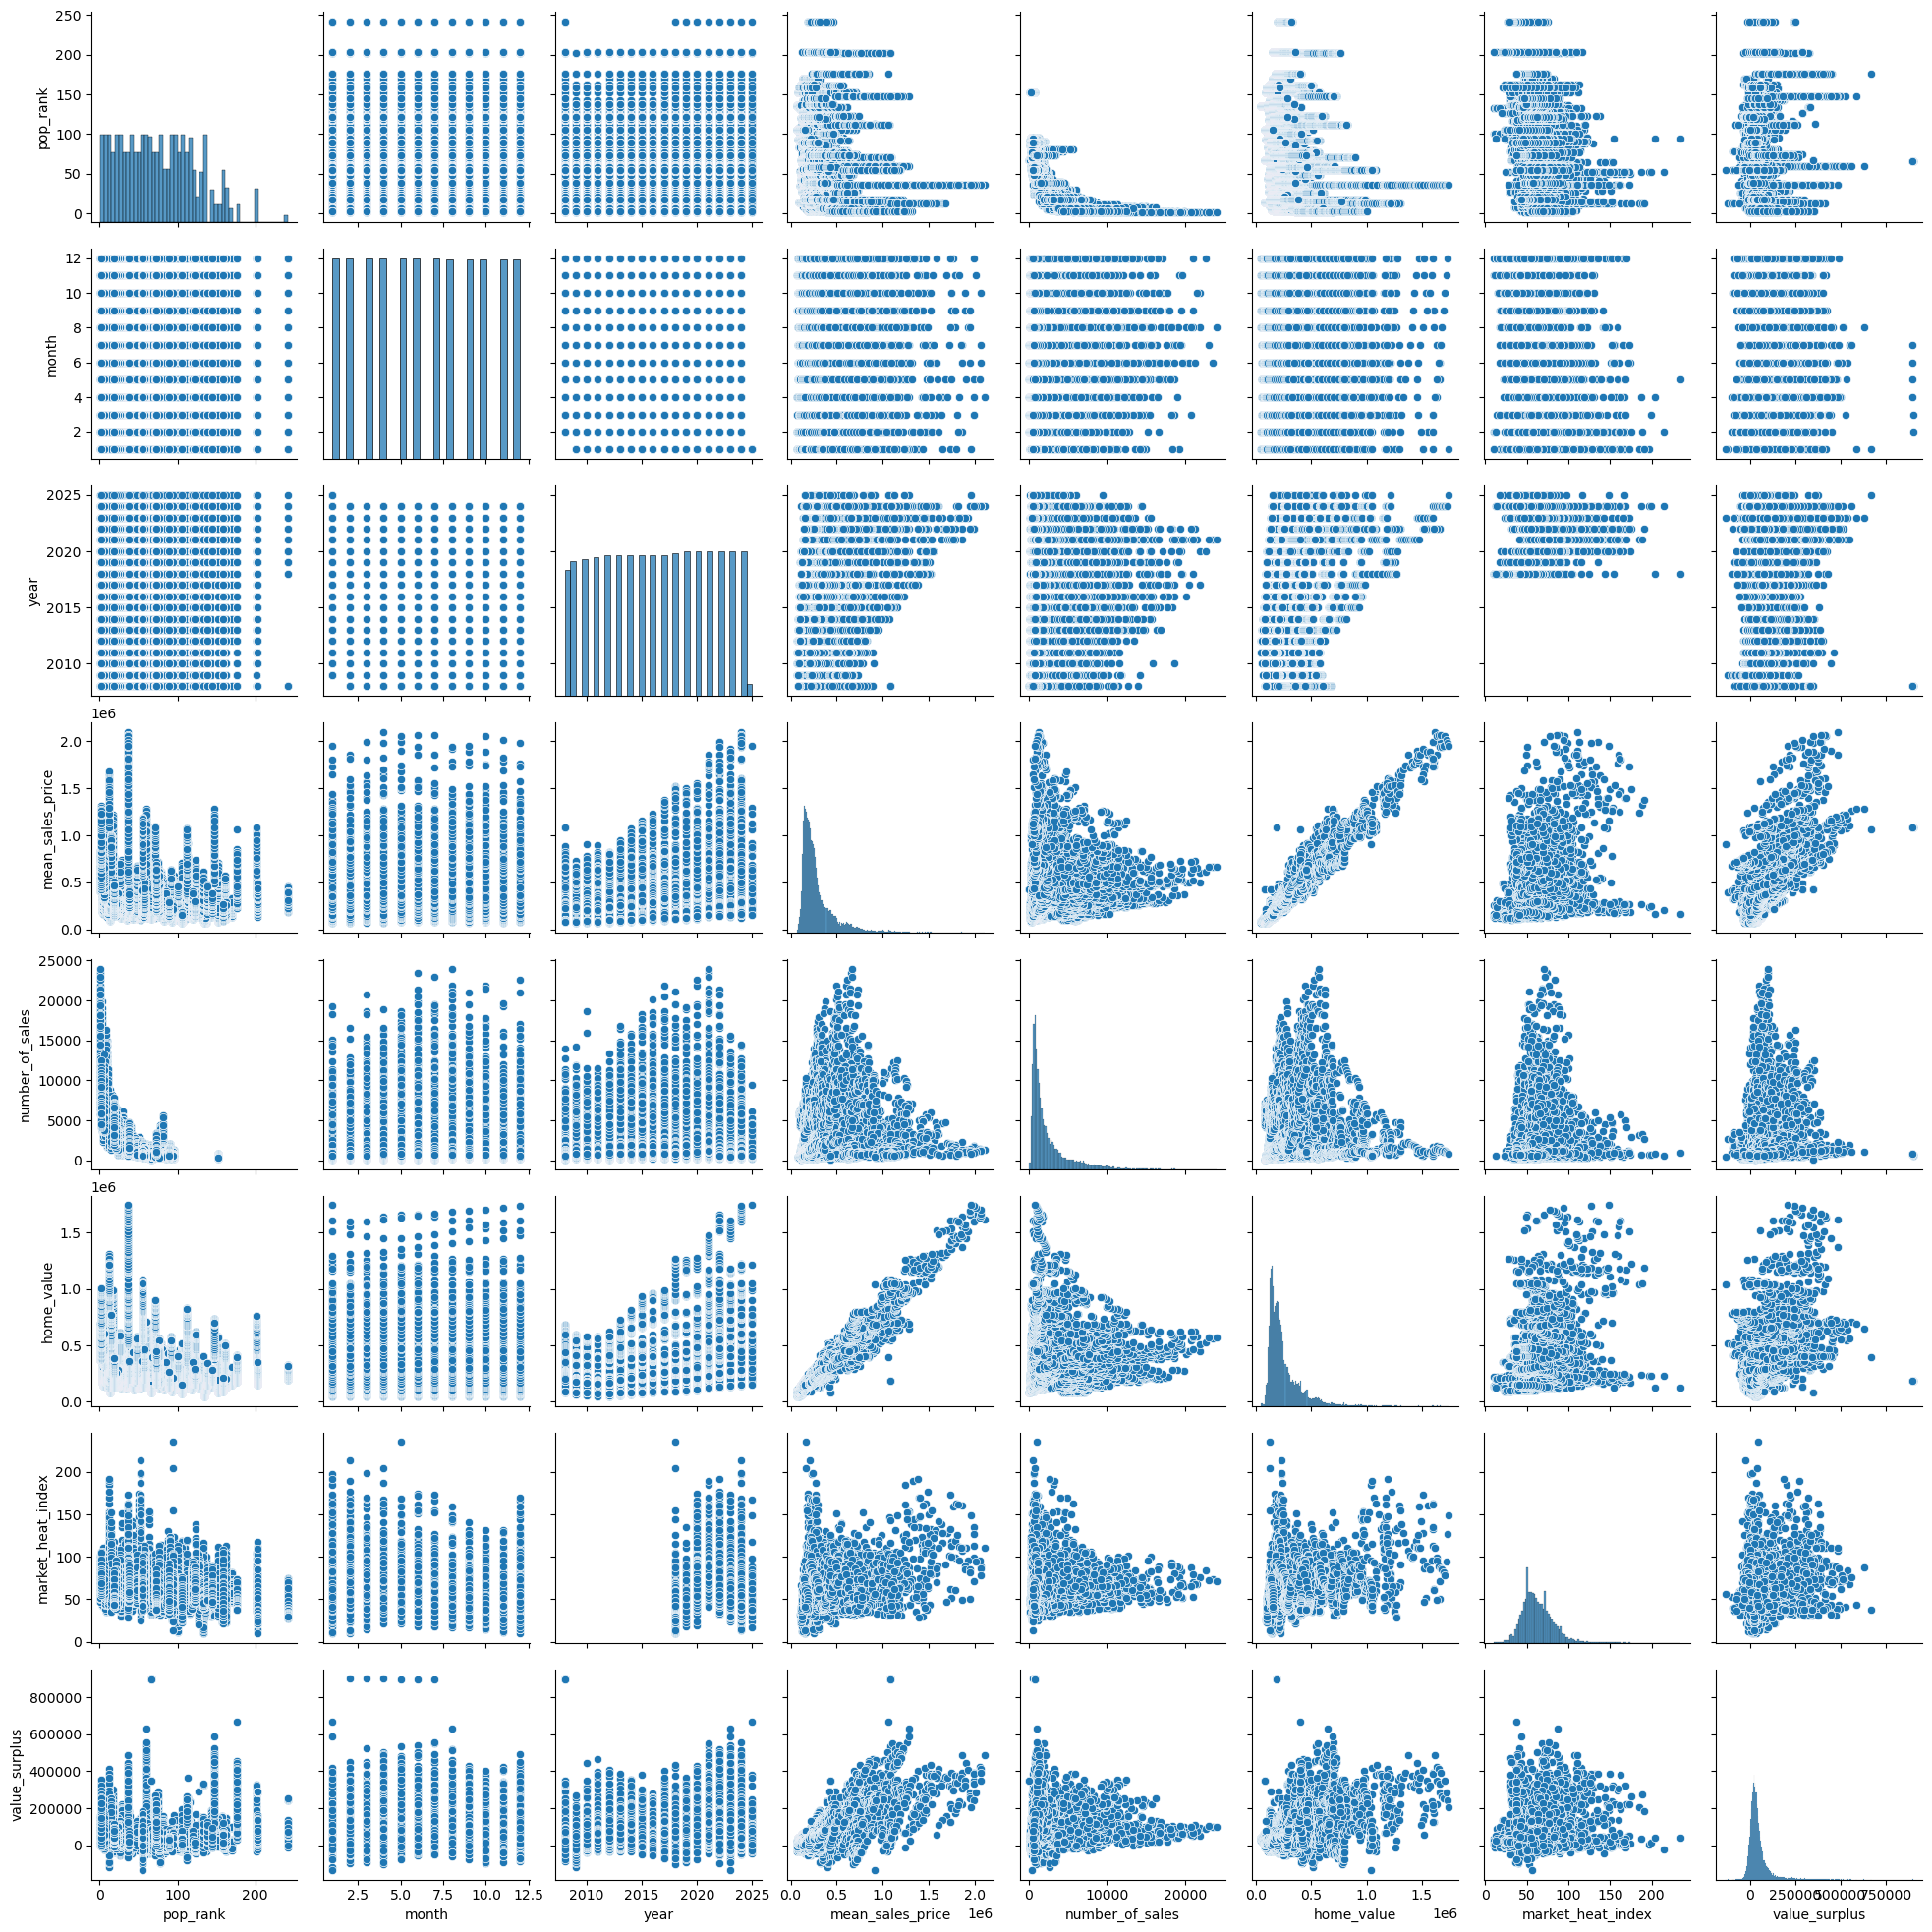

In [62]:
#plots of correlated data
sns.pairplot(numeric_data)
plt.show()

Multivariate plots

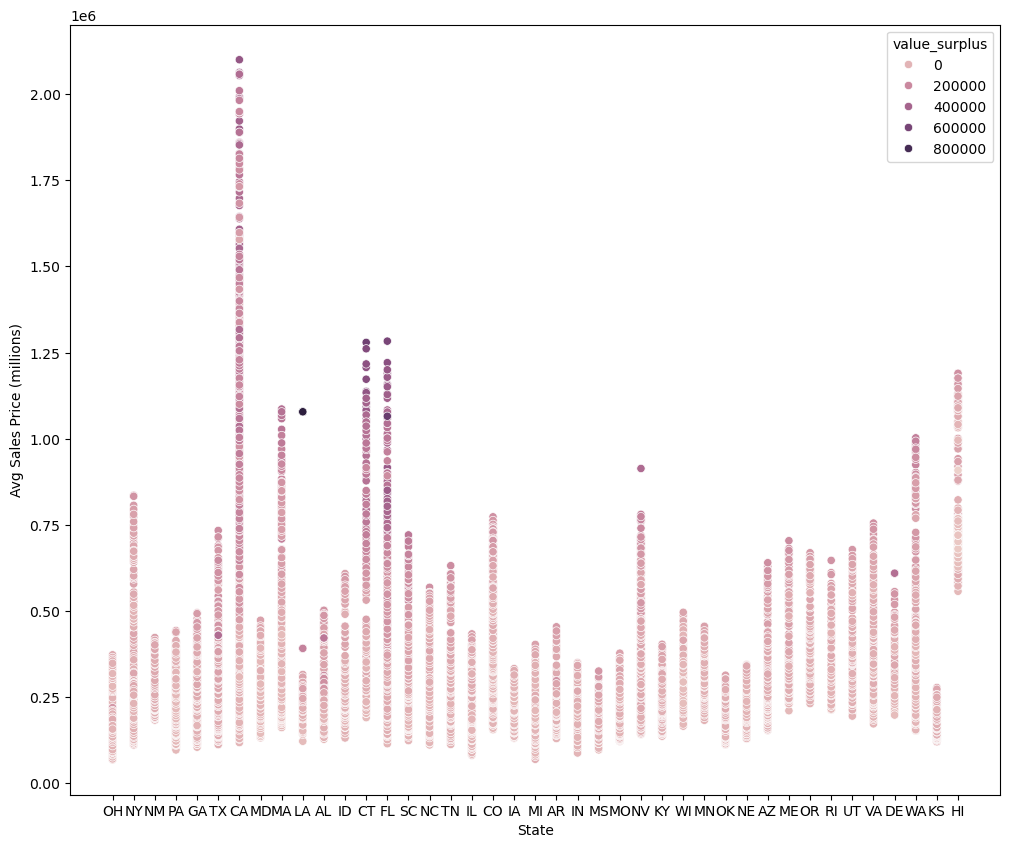

In [64]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data = zillow_df, x='state', y='mean_sales_price', hue='value_surplus')
plt.xlabel('State')
plt.ylabel('Avg Sales Price (millions)')
plt.show()

This chart shows how for the most part, the highest sales prices correlate with the largest difference from the home value.

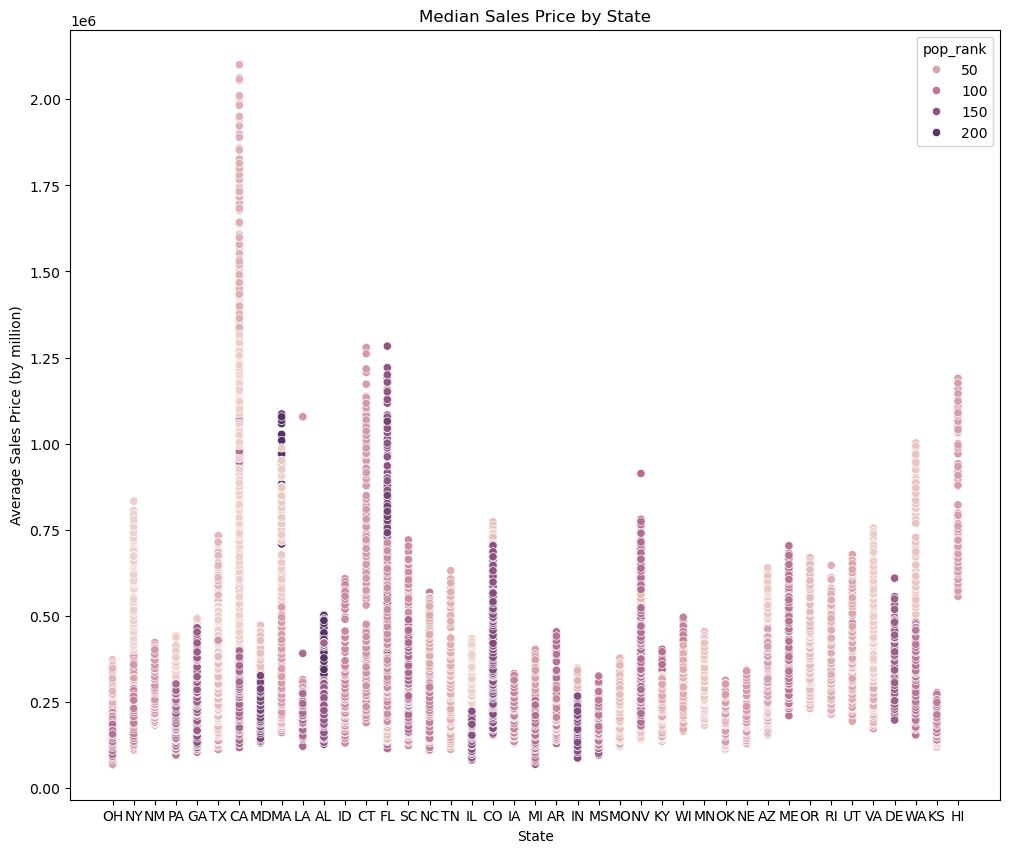

In [66]:
#state median accounting for population size
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(data=zillow_df, x='state', y='mean_sales_price', hue='pop_rank')
plt.xlabel('State')
plt.ylabel('Average Sales Price (by million)')
plt.title('Median Sales Price by State')
plt.show()

This chart shows the relationship between population size and sales price. We can see that it varies by state where some states have larger cities with higher prices (TX, NC, PA, NY, IN, IL, WA) and other states have lower prices for larger cities(FL, OR, MA)

In [68]:
#order state medians by year for time plotting
state_medians = state_medians.sort_values('year')
state_medians.head()

state  year  mean_sales_price  number_of_sales  home_value  \
732    MI  2008         110712.60           2871.0   116942.93   
37     DE  2008         609340.00              NaN   283543.16   
712    IL  2008         132580.80           7233.0   113005.21   
644    TN  2008         155873.75           1366.0   148253.95   
19     HI  2008         648281.40            718.0   626658.08   

     market_heat_index  value_surplus  pop_rank  
732                NaN       -4311.53      80.0  
37                 NaN      325796.84     134.0  
712                NaN       23494.79     136.0  
644                NaN        7017.27      65.0  
19                 NaN       22336.18      55.0

In [69]:
#create map with state data for mean sales
fig = px.choropleth(state_medians, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='mean_sales_price', 
                    color_continuous_scale='reds',
                    range_color=(0, 1000000),
                    animation_frame='year', 
                    scope='usa',
                    title='Avg Sales Price with Time Slider',
                   width=1000,
                   height=800)
fig.show()

The map shows the gradual increase over time for each state. We can see the highest increase in price over the past few years is occuring more in the western states - CA, NV, AZ, UT, CO, NM, WA, OR, ID

In [71]:
fig = px.choropleth(state_medians, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='home_value', 
                    color_continuous_scale='reds',
                    range_color=(0, 1000000),
                    animation_frame='year', 
                    scope='usa',
                    title='Avg Home Value with Time Slider',
                   width=1000,
                   height=800)
fig.show()

As expected from our correlation of home values to sales price, this has similar increases in the same states as sales price

In [73]:
fig = px.choropleth(state_medians, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='value_surplus', 
                    color_continuous_scale='rdbu_r',
                    color_continuous_midpoint=0,
                    range_color=(-200000, 200000),
                    animation_frame='year', 
                    scope='usa',
                    title='Price over value with Time Slider',
                   width=1000,
                   height=800)
fig.show()

This shows us that the sales price over value was calm for a long time but has spike much more in recent years as the map gets a lot more darker red shades in states such as ME, TX, NV, MA, AZ, NM, MS. Years before 2020 only had 1-2 states that were getting sales prices much higher than asking.

In [75]:
fig = px.choropleth(state_medians, 
                    locations='state', 
                    locationmode='USA-states', 
                    color='number_of_sales', 
                    color_continuous_scale='reds',
                    animation_frame='year', 
                    scope='usa',
                    title='Number of sales with Time Slider',
                   width=1000,
                   height=800)
fig.show()

The number of sales has remained pretty constant in each state where IL and GA having the most in most years.